# Guided Capstone 2 - NBA Win Model Prediction Using Machine Learning

# Section 0: Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
from datetime import datetime

# Section 1: Data Import and combination

Our attempt to recreate the prior investigators model will require data of the same time period and features. In the prior investigation, the data used produce their NBA win prediction model covered a 12 season span, between the seasons of 2008 - 2009 to 2019 - 2020. 

Kaggale offers several databases that included the data portion mentioned above. 

# 1.1 Data Stitching

From Kaggle, separate sets have been acquired for both player statistics and team statistics. These sets are separated by season and we will combine the datasets together to be analyzed.

In [2]:
#Appending the season sets into one team statistic and one player statistic dataframes.
start_year = 2008
end_year = 2009

team_stats = pd.DataFrame()
player_stats = pd.DataFrame()

for i in range(12) :
    player_stats_file_path = '/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/DS_Guided_Capstone_2_Repo/virenv/player_stats/' + str(start_year) + "-" + str(end_year) + '.csv'
    team_stats_file_path = '/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/DS_Guided_Capstone_2_Repo/virenv/team_stats/' + str(start_year) + "-" + str(end_year) + '.csv'
    player_stats = player_stats.append(pd.read_csv(player_stats_file_path))
    team_stats = team_stats.append(pd.read_csv(team_stats_file_path))
    
    start_year = start_year + 1
    end_year = end_year + 1

In [3]:
player_stats.shape

(373069, 26)

In [4]:
player_stats.head()

,Player,Date,Team,Against,Home,MP,FG,FGA,FG%,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-,GameLink
0,LeBron James,2008-10-28,Cleveland Cavaliers,Boston Celtics,0,36.00,9.0,21.0,0.429,0.0,...,6.0,7.0,6.0,2.0,1.0,3.0,4.0,22.0,-3.0,https://www.basketball-reference.com/boxscores...
1,Delonte West,2008-10-28,Cleveland Cavaliers,Boston Celtics,0,35.29,2.0,4.0,0.500,0.0,...,2.0,2.0,2.0,0.0,0.0,1.0,0.0,6.0,-10.0,https://www.basketball-reference.com/boxscores...
2,Mo Williams,2008-10-28,Cleveland Cavaliers,Boston Celtics,0,31.18,4.0,10.0,0.400,3.0,...,3.0,3.0,2.0,1.0,0.0,4.0,5.0,12.0,3.0,https://www.basketball-reference.com/boxscores...
3,Zydrunas Ilgauskas,2008-10-28,Cleveland Cavaliers,Boston Celtics,0,30.24,3.0,5.0,0.600,0.0,...,5.0,8.0,1.0,0.0,0.0,4.0,3.0,15.0,7.0,https://www.basketball-reference.com/boxscores...
4,Ben Wallace,2008-10-28,Cleveland Cavaliers,Boston Celtics,0,19.03,1.0,1.0,1.000,0.0,...,4.0,4.0,0.0,0.0,1.0,1.0,2.0,2.0,-1.0,https://www.basketball-reference.com/boxscores...


In [5]:
player_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373069 entries, 0 to 27739
Data columns (total 26 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Player    373069 non-null  object 
 1   Date      373069 non-null  object 
 2   Team      373069 non-null  object 
 3   Against   373069 non-null  object 
 4   Home      373069 non-null  int64  
 5   MP        311326 non-null  float64
 6   FG        311326 non-null  float64
 7   FGA       311326 non-null  float64
 8   FG%       295932 non-null  float64
 9   3P        311326 non-null  float64
 10  3PA       311326 non-null  float64
 11  3P%       199196 non-null  float64
 12  FT        311326 non-null  float64
 13  FTA       311326 non-null  float64
 14  FT%       179762 non-null  float64
 15  ORB       311326 non-null  float64
 16  DRB       311326 non-null  float64
 17  TRB       311326 non-null  float64
 18  AST       311326 non-null  float64
 19  STL       311326 non-null  float64
 20  BLK  

In [6]:
team_stats.shape

(15348, 124)

In [7]:
team_stats.head()

,gmDate,seasonType,season,teamWins,teamLosses,teamAbbr,teamLoc,teamRslt,teamDayOff,teamPTS,...,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,opptPoss,opptPace,matchWinner
0,2008-10-28,Regular,2008-09,0,1,CLE,Away,Loss,0.0,85.0,...,96.9,91.5,5.4,0.41,17.57,1.00,0.62,92.9,92.9,BOS
1,2008-10-28,Regular,2008-09,0,1,MIL,Away,Loss,0.0,95.0,...,120.3,105.8,14.5,0.48,28.53,1.50,0.50,89.8,89.8,CHI
2,2008-10-28,Regular,2008-09,0,1,POR,Away,Loss,0.0,76.0,...,107.7,85.3,22.4,0.44,18.08,1.27,0.53,89.1,89.1,LAL
3,2008-10-29,Regular,2008-09,1,0,TOR,Away,Win,0.0,95.0,...,99.8,112.8,-13.0,0.37,14.47,0.88,0.18,84.2,84.2,TOR
4,2008-10-29,Regular,2008-09,1,0,NJN,Away,Win,0.0,95.0,...,94.6,105.7,-11.1,0.36,17.86,1.20,0.27,89.9,89.9,NJN


In [8]:
team_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15348 entries, 0 to 1142
Columns: 124 entries, gmDate to matchWinner
dtypes: float64(110), int64(4), object(10)
memory usage: 14.6+ MB


In [9]:
team_stats.to_csv('Team_Stats.csv')

# 1.2 Reviewing and Cleaning Player Statistics

In [10]:
#Reorder columns
col = ['Player', 'Team', 'Against', 'Date']
other = [x for x in player_stats.columns if x not in col]
player_stats= player_stats[col + other]

In [11]:
#Dropping unecessary columns and % columns (we will separate attemtped shot #s to made and misses.)
player_stats.drop(columns = ['FG%', '3P%', 'FT%', 'GameLink'], inplace = True)

In [12]:
#Checking for Nans
player_stats.isna().sum()

Player         0
Team           0
Against        0
Date           0
Home           0
MP         61743
FG         61743
FGA        61743
3P         61743
3PA        61743
FT         61743
FTA        61743
ORB        61743
DRB        61743
TRB        61743
AST        61743
STL        61743
BLK        61743
TOV        61743
PF         61743
PTS        61743
+/-        61793
dtype: int64

It is clear that we are looking at a specific chunk of missing data. The "+/-" field also includes 50 additional Nan's. 

In [13]:
player_stats = player_stats[player_stats['MP'].notna()]

In [14]:
player_stats = player_stats[player_stats['MP']!=0]

In [15]:
player_stats.isna().sum()

Player      0
Team        0
Against     0
Date        0
Home        0
MP          0
FG          0
FGA         0
3P          0
3PA         0
FT          0
FTA         0
ORB         0
DRB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
PF          0
PTS         0
+/-        21
dtype: int64

In [16]:
player_stats[player_stats['+/-'].isna()].describe()

,Home,MP,FG,FGA,3P,3PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-
count,21.000000,21.000000,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,0.0
mean,0.523810,0.162381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
std,0.511766,0.142895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
min,0.000000,0.010000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
25%,0.000000,0.060000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
50%,1.000000,0.120000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
75%,1.000000,0.210000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
max,1.000000,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [17]:
#Above table shows that the last remaining Nan values do not contain anything useful.
player_stats = player_stats.dropna()

In [18]:
player_stats.isna().sum()

Player     0
Team       0
Against    0
Date       0
Home       0
MP         0
FG         0
FGA        0
3P         0
3PA        0
FT         0
FTA        0
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
+/-        0
dtype: int64

In [19]:
#Converting 'Date' column to datetime object
player_stats['Date'] = pd.to_datetime(player_stats['Date'])

In [20]:
player_stats[player_stats['Home'] == 1].head()

,Player,Team,Against,Date,Home,MP,FG,FGA,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-
12,Ray Allen,Boston Celtics,Cleveland Cavaliers,2008-10-28,1,40.39,2.0,9.0,1.0,4.0,...,1.0,3.0,4.0,1.0,1.0,0.0,4.0,1.0,8.0,-1.0
13,Paul Pierce,Boston Celtics,Cleveland Cavaliers,2008-10-28,1,38.13,10.0,19.0,2.0,4.0,...,1.0,2.0,3.0,4.0,1.0,0.0,2.0,4.0,27.0,12.0
14,Kevin Garnett,Boston Celtics,Cleveland Cavaliers,2008-10-28,1,36.09,5.0,15.0,0.0,0.0,...,1.0,5.0,6.0,2.0,2.0,0.0,2.0,1.0,11.0,5.0
15,Rajon Rondo,Boston Celtics,Cleveland Cavaliers,2008-10-28,1,29.57,4.0,5.0,0.0,0.0,...,1.0,4.0,5.0,6.0,3.0,0.0,2.0,5.0,14.0,4.0
16,Kendrick Perkins,Boston Celtics,Cleveland Cavaliers,2008-10-28,1,20.50,1.0,2.0,0.0,0.0,...,4.0,4.0,8.0,0.0,0.0,0.0,2.0,6.0,2.0,-7.0


In [21]:
player_stats['Team'].unique()

array(['Cleveland Cavaliers', 'Boston Celtics', 'Milwaukee Bucks',
       'Chicago Bulls', 'Portland Trail Blazers', 'Los Angeles Lakers',
       'Toronto Raptors', 'Philadelphia 76ers', 'New Jersey Nets',
       'Washington Wizards', 'Atlanta Hawks', 'Orlando Magic',
       'Miami Heat', 'New York Knicks', 'Phoenix Suns',
       'San Antonio Spurs', 'Oklahoma City Thunder', 'Sacramento Kings',
       'Minnesota Timberwolves', 'Indiana Pacers', 'Detroit Pistons',
       'Memphis Grizzlies', 'Houston Rockets', 'Denver Nuggets',
       'Utah Jazz', 'Los Angeles Clippers', 'New Orleans Hornets',
       'Golden State Warriors', 'Charlotte Bobc', 'Dallas Mavericks',
       'Charlotte Bobcats', 'Brooklyn Nets', 'New Orleans Pelicans',
       'Charlotte Hornets'], dtype=object)

In [22]:
player_stats.reset_index(drop = True, inplace = True)

In [23]:
#Removing non-regular season games. Dates are acquired from Basketballreference.com. 
dates =[['2008-10-28', '2009-04-16'],['2009-10-27', '2010-04-14'], ['2010-10-26', '2011-04-13' ], ['2011-12-25', '2012-04-26'], ['2012-10-30', '2013-04-17'], ['2013-10-29', '2014-04-16'], ['2014-10-28', '2015-04-15'], ['2015-10-27', '2016-04-13'], ['2016-10-25', '2017-04-12'], ['2017-10-17', '2018-04-11'], ['2018-10-16', '2019-04-10'], ['2019-10-22', '2020-08-14' ]]
is_regsea = lambda date : (date>= pd.to_datetime(start_date)) & (date<= pd.to_datetime(end_date))
all_regsea = pd.DataFrame()

for start_date, end_date in dates:
    print(start_date, end_date)
    all_regsea = pd.concat([all_regsea, player_stats.Date.apply(is_regsea)], axis=1)


2008-10-28 2009-04-16
2009-10-27 2010-04-14
2010-10-26 2011-04-13
2011-12-25 2012-04-26
2012-10-30 2013-04-17
2013-10-29 2014-04-16
2014-10-28 2015-04-15
2015-10-27 2016-04-13
2016-10-25 2017-04-12
2017-10-17 2018-04-11
2018-10-16 2019-04-10
2019-10-22 2020-08-14


In [24]:
all_regsea = all_regsea.sum(axis=1)
regsea = np.where(all_regsea == 1)[0]
player_stats = player_stats.loc[regsea]

Knowing that the Team statistics and player statistics dataframes will require some form of linkage for us to analyze the two sets together, a game ID can be created to bridge the dfs.

By selectively choosing just 1 team name and 1 date, we can create unique ids for each game. Knowing some NBA history, there are teams that have moved cities and changed names over the years, a single identifying value will be set for those teams. 

In [25]:
#New Jersey Nets moved to Brooklyn and known now as the (BKN) Brooklyn Nets
#New Orleans Hornets are now the (NOP) New Orlean Pelicans
#Charlotte Bobcats are now the (CHO) Charlotte Hornets 
name_change = player_stats[['Team', 'Against', 'Home']]

#Pulling abbreviations from team names, New York and New Jersey will both result in 'New'
#Changing names before the pull will give us the correct abbreviations
name_change['Team'] = name_change['Team'].replace({'New York Knicks' : 'NYK', 'New Jersey Nets': 'BKN', 'Brooklyn Nets':'BKN', 'New Orleans Hornets':'NOP', 'Charlotte Bobcats':'CHO', 'Charlotte Bobc':'CHO', 'Charlotte Hornets':'CHO', 'New Orleans Pelicans':'NOP', 'Los Angeles Lakers':'LAL', 'Los Angeles Clippers':'LAC' })
name_change['Against'] = name_change['Against'].replace({'New York Knicks' : 'NYK', 'New Jersey Nets': 'BKN', 'Brooklyn Nets':'BKN', 'New Orleans Hornets':'NOP', 'Charlotte Bobcats':'CHO', 'Charlotte Bobc':'CHO', 'Charlotte Hornets':'CHO', 'New Orleans Pelicans':'NOP', 'Los Angeles Lakers':'LAL', 'Los Angeles Clippers':'LAC' })


<ipython-input-25-ce389f236851>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_change['Team'] = name_change['Team'].replace({'New York Knicks' : 'NYK', 'New Jersey Nets': 'BKN', 'Brooklyn Nets':'BKN', 'New Orleans Hornets':'NOP', 'Charlotte Bobcats':'CHO', 'Charlotte Bobc':'CHO', 'Charlotte Hornets':'CHO', 'New Orleans Pelicans':'NOP', 'Los Angeles Lakers':'LAL', 'Los Angeles Clippers':'LAC' })
<ipython-input-25-ce389f236851>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_change['Against'] = n

In [26]:
#Pulling the home team's name abbreviation.
name_change['abbr'] = np.where(name_change['Home']==1, name_change['Team'].str[0:3].str.upper(), name_change['Against'].str[0:3].str.upper())

<ipython-input-26-9081e4525c91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_change['abbr'] = np.where(name_change['Home']==1, name_change['Team'].str[0:3].str.upper(), name_change['Against'].str[0:3].str.upper())


In [27]:
#Abbreviations work for most teams, but a few will still require fixing. 

name_change['abbr'] = name_change['abbr'].replace({'SAN':'SAS', 'OKL': 'OKC', 'GOL':'GSW'})
name_change['Team'] = name_change['Team'].str[0:3].str.upper().replace({'SAN':'SAS', 'OKL': 'OKC', 'GOL':'GSW'})

<ipython-input-27-7241b9ceb850>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_change['abbr'] = name_change['abbr'].replace({'SAN':'SAS', 'OKL': 'OKC', 'GOL':'GSW'})
<ipython-input-27-7241b9ceb850>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_change['Team'] = name_change['Team'].str[0:3].str.upper().replace({'SAN':'SAS', 'OKL': 'OKC', 'GOL':'GSW'})


In [28]:
player_stats['Teamabbr'] = name_change['Team']

player_stats['gameID'] =  player_stats['Date'].dt.strftime('%Y%m%d') + name_change['abbr']
player_stats.drop(columns = 'Home', inplace=True)
player_stats.head()

,Player,Team,Against,Date,MP,FG,FGA,3P,3PA,FT,...,TRB,AST,STL,BLK,TOV,PF,PTS,+/-,Teamabbr,gameID
0,LeBron James,Cleveland Cavaliers,Boston Celtics,2008-10-28,36.00,9.0,21.0,0.0,4.0,4.0,...,7.0,6.0,2.0,1.0,3.0,4.0,22.0,-3.0,CLE,20081028BOS
1,Delonte West,Cleveland Cavaliers,Boston Celtics,2008-10-28,35.29,2.0,4.0,0.0,1.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,6.0,-10.0,CLE,20081028BOS
2,Mo Williams,Cleveland Cavaliers,Boston Celtics,2008-10-28,31.18,4.0,10.0,3.0,5.0,1.0,...,3.0,2.0,1.0,0.0,4.0,5.0,12.0,3.0,CLE,20081028BOS
3,Zydrunas Ilgauskas,Cleveland Cavaliers,Boston Celtics,2008-10-28,30.24,3.0,5.0,0.0,0.0,9.0,...,8.0,1.0,0.0,0.0,4.0,3.0,15.0,7.0,CLE,20081028BOS
4,Ben Wallace,Cleveland Cavaliers,Boston Celtics,2008-10-28,19.03,1.0,1.0,0.0,0.0,0.0,...,4.0,0.0,0.0,1.0,1.0,2.0,2.0,-1.0,CLE,20081028BOS


In [30]:
player_stats.sort_values(by = 'Date', ascending = False, inplace = True)
player_stats.reset_index(inplace = True, drop = True)

In [31]:
player_stats.columns

Index(['Player', 'Team', 'Against', 'Date', 'MP', 'FG', 'FGA', '3P', '3PA',
       'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', '+/-', 'Teamabbr', 'gameID'],
      dtype='object')

In [32]:
#Separating Attempted shots = Missed + Made
player_stats['FTM'] = player_stats['FTA'] - player_stats['FT']
player_stats['FGM'] = player_stats['FGA'] - player_stats['FG']

In [33]:
player_stats.shape
#Compared to the initial shape (373069, 27)

(290939, 25)

In [34]:
#reordering column order
new_order = [22, 0, 1, 2, 3, 4, 5, 6, 24, 7, 8, 9 ,10, 11, 23, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
player_stats = player_stats[player_stats.columns[new_order]]

In [35]:
clean_player_stats = player_stats

In [36]:
clean_player_stats.head()

,gameID,Player,Team,Against,Date,MP,FG,FGA,FGM,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-,Teamabbr
0,20200814HOU,Ben McLemore,Houston Rockets,Philadelphia 76ers,2020-08-14,11.21,1.0,4.0,3.0,1.0,...,2.0,2.0,1.0,1.0,0.0,0.0,0.0,3.0,-17.0,HOU
1,20200814IND,Chris Silva,Miami Heat,Indiana Pacers,2020-08-14,24.29,2.0,4.0,2.0,0.0,...,7.0,11.0,1.0,0.0,3.0,1.0,3.0,5.0,-12.0,MIA
2,20200814TOR,Dewan Hernandez,Toronto Raptors,Denver Nuggets,2020-08-14,12.42,2.0,6.0,4.0,0.0,...,4.0,7.0,1.0,0.0,0.0,1.0,0.0,4.0,0.0,TOR
3,20200814IND,Kendrick Nunn,Miami Heat,Indiana Pacers,2020-08-14,32.58,8.0,27.0,19.0,1.0,...,1.0,2.0,4.0,3.0,1.0,5.0,1.0,23.0,-21.0,MIA
4,20200814IND,Tyler Herro,Miami Heat,Indiana Pacers,2020-08-14,27.56,6.0,16.0,10.0,3.0,...,0.0,1.0,3.0,0.0,0.0,3.0,2.0,16.0,-10.0,MIA


# 1.3 Saving Cleaned Player Stats Data To CSV

In [37]:
clean_player_stats.to_csv('Cleaned_Player_Stats.csv')

# 1.3 Cleaning team_stats

In [38]:
#read in team_stats
team_stats = pd.read_csv('Team_Stats.csv')

In [39]:
team_stats.reset_index(drop=True)

,Unnamed: 0,gmDate,seasonType,season,teamWins,teamLosses,teamAbbr,teamLoc,teamRslt,teamDayOff,...,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,opptPoss,opptPace,matchWinner
0,0,2008-10-28,Regular,2008-09,0,1,CLE,Away,Loss,0.0,...,96.9,91.5,5.4,0.41,17.57,1.00,0.62,92.9,92.9,BOS
1,1,2008-10-28,Regular,2008-09,0,1,MIL,Away,Loss,0.0,...,120.3,105.8,14.5,0.48,28.53,1.50,0.50,89.8,89.8,CHI
2,2,2008-10-28,Regular,2008-09,0,1,POR,Away,Loss,0.0,...,107.7,85.3,22.4,0.44,18.08,1.27,0.53,89.1,89.1,LAL
3,3,2008-10-29,Regular,2008-09,1,0,TOR,Away,Win,0.0,...,99.8,112.8,-13.0,0.37,14.47,0.88,0.18,84.2,84.2,TOR
4,4,2008-10-29,Regular,2008-09,1,0,NJN,Away,Win,0.0,...,94.6,105.7,-11.1,0.36,17.86,1.20,0.27,89.9,89.9,NJN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15343,1138,2020-09-24,Playoffs,2019-20,3,1,LAL,Away,Win,1.0,...,120.4,127.1,-6.7,0.48,22.03,2.00,0.36,89.7,89.7,LAL
15344,1139,2020-09-25,Playoffs,2019-20,3,2,MIA,Away,Loss,1.0,...,119.6,106.7,12.9,0.46,24.12,2.64,0.64,101.2,101.2,BOS
15345,1140,2020-09-26,Playoffs,2019-20,1,4,DEN,Away,Loss,1.0,...,119.1,108.9,10.2,0.49,23.71,1.85,0.46,98.2,98.2,LAL
15346,1141,2020-09-27,Playoffs,2019-20,2,4,BOS,Away,Loss,1.0,...,125.2,113.2,12.0,0.50,27.13,2.50,0.50,99.9,99.9,MIA


In [40]:
#Converting 'gmDate' column to datetime object
team_stats['gmDate'] = pd.to_datetime(team_stats['gmDate'])

In [41]:
#Removing extra index column
team_stats= team_stats.iloc[:,1:]
team_stats.head()

,gmDate,seasonType,season,teamWins,teamLosses,teamAbbr,teamLoc,teamRslt,teamDayOff,teamPTS,...,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,opptPoss,opptPace,matchWinner
0,2008-10-28,Regular,2008-09,0,1,CLE,Away,Loss,0.0,85.0,...,96.9,91.5,5.4,0.41,17.57,1.00,0.62,92.9,92.9,BOS
1,2008-10-28,Regular,2008-09,0,1,MIL,Away,Loss,0.0,95.0,...,120.3,105.8,14.5,0.48,28.53,1.50,0.50,89.8,89.8,CHI
2,2008-10-28,Regular,2008-09,0,1,POR,Away,Loss,0.0,76.0,...,107.7,85.3,22.4,0.44,18.08,1.27,0.53,89.1,89.1,LAL
3,2008-10-29,Regular,2008-09,1,0,TOR,Away,Win,0.0,95.0,...,99.8,112.8,-13.0,0.37,14.47,0.88,0.18,84.2,84.2,TOR
4,2008-10-29,Regular,2008-09,1,0,NJN,Away,Win,0.0,95.0,...,94.6,105.7,-11.1,0.36,17.86,1.20,0.27,89.9,89.9,NJN


In [42]:
#We will separate the data into regular season and playoffs.
team_stats = team_stats[team_stats['seasonType']=='Regular']

In [43]:
#The games stats are recorded as team vs. opponent with another column indicating whether this is a home game or an away game. 
#This format leaves me to suspect there is double data of the same game. Let's investigate. 

team_stats['gmDate'] = pd.to_datetime(team_stats['gmDate'])
team_stats[['teamAbbr', 'teamLoc', 'opptAbbr', 'opptLoc', 'gmDate', 'opptLoc']][team_stats['gmDate'] == datetime(2019,3,22)]

#Seems our suspicion was wrong and away_games=team as home_games=opp. We will keep this in mind during feature enginAllstar games are not included as well. 

,teamAbbr,teamLoc,opptAbbr,opptLoc,gmDate,opptLoc
13972,MEM,Away,ORL,Home,2019-03-22,Home
13973,LAC,Away,CLE,Home,2019-03-22,Home
13974,DEN,Away,NYK,Home,2019-03-22,Home
13975,OKC,Away,TOR,Home,2019-03-22,Home
13976,SAS,Away,HOU,Home,2019-03-22,Home
13977,MIA,Away,MIL,Home,2019-03-22,Home
13978,BRK,Away,LAL,Home,2019-03-22,Home


In [44]:
team_stats.reset_index(inplace = True, drop = True)

In [45]:
#Removing any games that are not within the regular season
all_regsea2 = pd.DataFrame()
is_regsea = lambda date : (date>= pd.to_datetime(start_date)) & (date<= pd.to_datetime(end_date))

for start_date, end_date in dates:
    print(start_date, end_date)
    all_regsea2 = pd.concat([all_regsea2, team_stats.gmDate.apply(is_regsea)], axis=1)

2008-10-28 2009-04-16
2009-10-27 2010-04-14
2010-10-26 2011-04-13
2011-12-25 2012-04-26
2012-10-30 2013-04-17
2013-10-29 2014-04-16
2014-10-28 2015-04-15
2015-10-27 2016-04-13
2016-10-25 2017-04-12
2017-10-17 2018-04-11
2018-10-16 2019-04-10
2019-10-22 2020-08-14


In [46]:
all_regsea2 = all_regsea2.sum(axis=1)
regsea2 = np.where(all_regsea2 == 1)[0]
team_stats = team_stats.loc[regsea2]

In [47]:
team_stats.reset_index(inplace = True, drop = True)

In [48]:
#The games stats are recorded as team vs. opponent with another column indicating whether this is a home game or an away game. 
#This format leaves me to suspect there is double data of the same game. Let's investigate. 

team_stats['gmDate'] = pd.to_datetime(team_stats['gmDate'])
team_stats[['teamAbbr', 'teamLoc', 'opptAbbr', 'opptLoc']][team_stats['gmDate'] == datetime(2019,3,22)]

#Seems our suspicion was wrong and away_games=team as home_games=opp. We will keep this in mind during feature engineering. 

,teamAbbr,teamLoc,opptAbbr,opptLoc
13138,MEM,Away,ORL,Home
13139,LAC,Away,CLE,Home
13140,DEN,Away,NYK,Home
13141,OKC,Away,TOR,Home
13142,SAS,Away,HOU,Home
13143,MIA,Away,MIL,Home
13144,BRK,Away,LAL,Home


In [49]:
len(team_stats['opptAbbr'].unique())

33

In [50]:
#33 teams, 3 more than what we had with the player stats, that means we have 3 team abbreviations that are duplicates
#CHA were the charlotte bobcats that because the new charlotto hornets CHO 
#NJN became the BKN
#NOH changed name to NOP
team_name_change = team_stats['opptAbbr'].replace({'NJN':'BKN', 'CHA':'CHO', 'BRK':'BKN', 'NOH' : 'NOP'})

#changing team names to maintain consistency in the data
team_stats['teamAbbr'] = team_stats['teamAbbr'].replace({'NJN':'BKN', 'CHA':'CHO', 'BRK':'BKN', 'NOH' : 'NOP'})
team_stats['opptAbbr'] = team_stats['opptAbbr'].replace({'NJN':'BKN', 'CHA':'CHO', 'BRK':'BKN', 'NOH' : 'NOP'})

In [51]:
len(team_name_change.unique())

30

In [52]:
dateString =  team_stats['gmDate'].dt.strftime('%Y%m%d')

In [53]:
dateString[dateString.eq('20190322')]

13138    20190322
13139    20190322
13140    20190322
13141    20190322
13142    20190322
13143    20190322
13144    20190322
Name: gmDate, dtype: object

In [54]:
# Creating game id for each game, as the nomenclature are the same, we should expect the same ID's as the players stats
team_stats['GameID'] = dateString + team_name_change

In [55]:
team_stats[['GameID','teamAbbr', 'opptAbbr', 'opptLoc']][team_stats['gmDate'] == datetime(2008,10,28)]

,GameID,teamAbbr,opptAbbr,opptLoc
0,20081028BOS,CLE,BOS,Home
1,20081028CHI,MIL,CHI,Home
2,20081028LAL,POR,LAL,Home


In [56]:
#Renaming Columns

team_stats.rename(columns = {'gmDate' : 'Date', 'teamAbbr' : 'A_Team', 'opptAbbr' : 'H_Team' ,'teamFGM': 'teamFGMade', 'team2PM' : 'team2PMade' , 'team3PM' : 'team3PMade', 'teamFTM' : 'teamFTMade',   'opptFGM': 'opptFGMade', 'oppt2PM': 'oppt2PMade', 'oppt3PM' : 'oppt3PMade', 'opptFTM' : 'opptFTMade'}, inplace = True)

In [57]:
#Removing percentage columns. 

team_stats.drop(columns = ['seasonType', 'teamFG%', 'team2P%', 'team3P%', 'teamFT%', 'teamTREB%', 'teamASST%', 'teamTS%', 'teamEFG%', 'teamOREB%', 'teamLoc', 'teamDREB%', 'teamTO%', 'teamSTL%', 'teamBLK%', 'teamBLKR', 'teamPPS', 'teamFIC', 'teamFIC40' , 'teamPlay%', 'teamAR', 'teamPoss', 'teamPace', 'teamSTL/TO', 'teamEDiff', 'opptEDiff', 'teamAST/TO', 'opptAST/TO', 'opptFG%', 'oppt2P%', 'oppt3P%', 'opptFT%', 'opptTREB%', 'opptASST%', 'opptTS%', 'opptEFG%', 'opptLoc', 'opptOREB%', 'opptDREB%', 'opptTO%', 'opptSTL%', 'opptBLK%', 'opptBLKR', 'opptPPS', 'opptFIC', 'opptFIC40', 'opptPlay%', 'opptAR', 'opptSTL/TO', 'opptPoss', 'opptPace'], inplace = True)

In [58]:
team_stats['H_Loc'] = team_stats['H_Team']

In [59]:
#Separating statistics

team_stats['teamFGMissed'] = team_stats['teamFGA'] - team_stats['teamFGMade']
team_stats['team2PMissed'] = team_stats['team2PA'] - team_stats['team2PMade'] 
team_stats['team3PMissed'] = team_stats['team3PA'] - team_stats['team3PMade']
team_stats['opptFGMissed'] = team_stats['opptFGA'] - team_stats['opptFGMade']
team_stats['oppt2PMissed'] = team_stats['oppt2PA'] - team_stats['oppt2PMade']
team_stats['oppt3PMissed'] = team_stats['oppt3PA'] - team_stats['oppt3PMade']

In [60]:
team_stats.sort_values(by = 'Date', ascending = False, inplace=True)
team_stats.reset_index(inplace = True, drop = True)

In [61]:
team_stats.columns = [col.replace('team', 'A_') for col in team_stats.columns]
team_stats.columns = [col.replace('oppt', 'H_') for col in team_stats.columns]

In [63]:
#Reorder the columns for easier visuals

def alternate_lists(l_1, l_2) :
    l = []
    for i in range(len(l_1)) :
        l.append(l_1[i])
        l.append(l_2[i])
    return l

new_column_order = []
l = ['Date', 'GameID', 'season', 'H_Team', 'H_Wins', 'H_Losses', 'A_Team','A_Wins', 'A_Losses', 'H_Loc']

other = [x for x in team_stats.columns if x not in l] 

for i in range (1, 10) :
    h_stats_for_given_quarter = [x for x in other if x[-1] == str(i) and 'H_' in x]
    a_stats_for_given_quarter = [x for x in other if x[-1] == str(i) and 'A_' in x]
    
    overall_stats = alternate_lists(h_stats_for_given_quarter, a_stats_for_given_quarter)
    new_column_order += overall_stats

h_full_game_stats = [x for x in other if x not in new_column_order and 'H_' in x]
a_full_game_stats = [x for x in other if x not in new_column_order and 'A_' in x]
overall_full_game_stats = alternate_lists(h_full_game_stats, a_full_game_stats)

new_column_order = l + overall_full_game_stats + new_column_order

cleaned_team_stats= team_stats[new_column_order]

In [64]:
cleaned_team_stats.head()

,Date,GameID,season,H_Team,H_Wins,H_Losses,A_Team,A_Wins,A_Losses,H_Loc,...,H_PTS5,A_PTS5,H_PTS6,A_PTS6,H_PTS7,A_PTS7,H_PTS8,A_PTS8,H_PTS9,A_PTS9
0,2020-08-14,20200814HOU,2019-20,HOU,44,28,PHI,43,30,HOU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-08-14,20200814LAC,2019-20,LAC,49,23,OKC,44,28,LAC,...,20.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-08-14,20200814IND,2019-20,IND,45,28,MIA,44,29,IND,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-08-14,20200814TOR,2019-20,TOR,53,19,DEN,46,27,TOR,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-08-13,20200813BKN,2019-20,BKN,35,37,POR,35,39,BKN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14343,2008-10-29,20081029WAS,2008-09,WAS,0,1,BKN,1,0,WAS,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14344,2008-10-29,20081029PHI,2008-09,PHI,0,1,TOR,1,0,PHI,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14345,2008-10-28,20081028LAL,2008-09,LAL,1,0,POR,0,1,LAL,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14346,2008-10-28,20081028CHI,2008-09,CHI,1,0,MIL,0,1,CHI,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
cleaned_team_stats.to_csv('cleaned_team_stats.csv')

# Section 2 Feature Engineering

Our main goal is to predict winning and losing of games between teams. The statistics that teams and players accrue in games are not as helpful individually, therefore, we will engineer a few features that will provide more insight into win/loss predictions. 

1. Elo Ratings 
The Elo system is a calculate stat that keeps track of relative skill and quality of teams within the league. Everyteam starts with the same Elo rating at the beggining of a season, and will either add to or subtract value from their opponents as they win/lose throughout the season. 

2. Recent Team Performances 
We will keep track of the rolling averages for a teams performance over the last 10 games prior to the game we are predicting. This gives us a glimps of how the team is playing recently leading up to the predicted game. 

3. Recent Player Performances 
Keeping track of player performances will allow us to see the players trajectory leading up to the predicted game. 

4. Player Performance In Season
Likewise, how this player has performed up to their current game within the season can also gives us glimpse into how their performances are trending. 

# 2.1 Elo Ratings

## Read in Team stats

In [66]:
team_stats = pd.read_csv('cleaned_team_stats.csv')
team_stats['Date'] = pd.to_datetime(team_stats['Date'])
team_stats.drop(columns = team_stats.columns[0], axis=1, inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14348 entries, 0 to 14347
Data columns (total 80 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        14348 non-null  datetime64[ns]
 1   GameID      14348 non-null  object        
 2   season      14348 non-null  object        
 3   H_Team      14348 non-null  object        
 4   H_Wins      14348 non-null  int64         
 5   H_Losses    14348 non-null  int64         
 6   A_Team      14348 non-null  object        
 7   A_Wins      14348 non-null  int64         
 8   A_Losses    14348 non-null  int64         
 9   H_Loc       14348 non-null  object        
 10  H_Rslt      14348 non-null  object        
 11  A_Rslt      14348 non-null  object        
 12  H_DayOff    14348 non-null  float64       
 13  A_DayOff    14348 non-null  float64       
 14  H_PTS       14348 non-null  float64       
 15  A_PTS       14348 non-null  float64       
 16  H_AST       14348 non-

Wiki: https://en.wikipedia.org/wiki/Elo_rating_system

Elo rating takes into account variables such as difficulty of schedule, home court advantage, margin of victory, and etc. These variables give more insight than simply utilizing team win record percentages. The formula below was concepted by [Nate Silver](https://fivethirtyeight.com/features/how-we-calculate-nba-elo-ratings/#:~:text=Here's%20the%20formula%3A%20Take%20the,and%20then%20divide%20by%2028.). 

All teams start off with a 1500 elo rating. After each game, the winner is awarded addition elo ratings and the loser has their elo ratings subtracted. The equation to calculate for Elo is shown below, where $R_{i}$ is the current Elo rating.

$$ R_{i + 1} = k * (S_{team} - E_{team} + R_{i}) $$


$S_{team} = 1 $ when the team wins, and 0 if the team loses. The $E_{team}$ value is expected win probability of the team which is further defined as 

$$ E_{team} = \frac{1}{1+10^{\frac{opp\_elo - team\_elo}{400}}}$$

The $k$ in the the Elo equation is a moving constant depending on the margin of victory and difference in Elo ratings. The k constant is calculated as: 

$$ k = 20 \frac{(MOV_{winner} + 3)^{0.8}}{7.5 + 0.006(elo\_difference_{winner})} $$

#### "While teams always gain Elo points after wins and lose Elo points after losses, they gain or lose more with larger margins of victory."

Elo ratings carry over from season to season, as teams who were good previous season, usually do not have significant drop offs from previous seasons. If $R$ is a teams final Elo rating for a season, than below is the Elo rating to being their next season. 

$$ (R * 0.75) + (0.25 * 0501)$$

## Def Elo Variable Functions

Function for win probabilty as per Nate Silver [Win Prob](https://fivethirtyeight.com/features/introducing-nfl-elo-ratings/)

$$ Pr(Home) = \frac{1}{10^{(-EloDiff/400)}+1}$$

In [67]:
#Define function to calculate Win Probability implied by Elo ratings and home court adjustments
def win_probs(home_elo, away_elo, home_court_advantage) :
    #The Math. pow() function returns the base to the exponent power
    h = math.pow(10, home_elo/400)
    r = math.pow(10, away_elo/400)
    a = math.pow(10, home_court_advantage/400)
    
    denom = r + a*h
    home_prob = a*h / denom
    away_prob = r / denom
    
    return home_prob, away_prob

#odds the home team will win based on elo ratings and home court advantage

def home_odds_on(home_elo, away_elo, home_court_advantage) :
    h = math.pow(10, home_elo/400)
    r = math.pow(10, away_elo/400)
    a = math.pow(10, home_court_advantage/400)
    
    return a*h/r

#this function determines the "k" constant used in the elo rating, based on margin of victory and difference in elo ratings
def elo_k(MOV, elo_diff):
    k = 20
    if MOV>0:
        multiplier=(MOV+3)**(0.8)/(7.5+0.006*(elo_diff))
    else:
        multiplier=(-MOV+3)**(0.8)/(7.5+0.006*(-elo_diff))
    return k*multiplier

#updates the home and away teams elo ratings after a game 

def update_elo(home_score, away_score, home_elo, away_elo, home_court_advantage) :
    home_prob, away_prob = win_probs(home_elo, away_elo, home_court_advantage) 
    
    if (home_score - away_score > 0) :
        
        home_win = 1 
        away_win = 0 
    
    else :
        
        home_win = 0 
        away_win = 1 
        
    k = elo_k(home_score - away_score, home_elo - away_elo)
    
    updated_home_elo = home_elo + k * (home_win - home_prob) 
    updated_away_elo = away_elo + k * (away_win - away_prob)
    
    return updated_home_elo, updated_away_elo


#takes into account prev season elo
def get_prev_elo(team, date, season, team_stats, elo_df) :
    prev_game = team_stats[team_stats['Date'] < game_date][(team_stats['H_Team'] == team) | (team_stats['A_Team'] == team)].sort_values(by = 'Date').tail(1).iloc[0] 
    
    if team == prev_game['H_Team'] :
        elo_rating = elo_df[elo_df['GameID'] == prev_game['GameID']]['H_Team_Elo_After'].values[0]
        
    else :
        elo_rating = elo_df[elo_df['GameID'] == prev_game['GameID']]['A_Team_Elo_After'].values[0]
        
    if prev_game['season'] != season :
        return (0.75 * elo_rating) + (0.25 * 1505)
    
    else :
        return elo_rating


## Calculating Elo Ratings

In [68]:
team_stats.sort_values(by = 'Date', inplace = True)
team_stats.reset_index(inplace=True, drop = True)

elo_df = pd.DataFrame(columns=['GameID', 'H_Team', 'A_Team', 'H_Team_Elo_Before', 'A_Team_Elo_Before', 'H_Team_Elo_After', 'A_Team_Elo_After'])
teams_elo_df = pd.DataFrame(columns=['GameID','Team', 'Elo', 'Date', 'Where_Played', 'season']) 

for index, row in team_stats.iterrows(): 
    game_id = row['GameID']
    game_date = row['Date']
    season = row['season']
    h_team, a_team = row['H_Team'], row['A_Team']
    h_score, a_score = row['H_PTS'], row['A_PTS'] 
    
    if (h_team not in elo_df['H_Team'].values and h_team not in elo_df['A_Team'].values) :
        h_team_elo_before = 1500
    else :
        h_team_elo_before = get_prev_elo(h_team, game_date, season, team_stats, elo_df)
    
    if (a_team not in elo_df['H_Team'].values and a_team not in elo_df['A_Team'].values) : 
        a_team_elo_before = 1500
    
    else :
        a_team_elo_before = get_prev_elo(a_team, game_date, season, team_stats, elo_df)
    
    h_team_elo_after, a_team_elo_after = update_elo(h_score, a_score, h_team_elo_before, a_team_elo_before, 69)
    
    new_row = {'GameID': game_id, 'H_Team': h_team, 'A_Team': a_team, 'H_Team_Elo_Before': h_team_elo_before, 'A_Team_Elo_Before': a_team_elo_before, \
                                                                        'H_Team_Elo_After' : h_team_elo_after, 'A_Team_Elo_After': a_team_elo_after}
    teams_row_one = {'GameID': game_id,'Team': h_team, 'Elo': h_team_elo_before, 'Date': game_date, 'Where_Played': 'Home', 'season': season}
    teams_row_two = {'GameID': game_id,'Team': a_team, 'Elo': a_team_elo_before, 'Date': game_date, 'Where_Played': 'Away', 'season': season}

    elo_df = elo_df.append(new_row, ignore_index = True)
    teams_elo_df = teams_elo_df.append(teams_row_one, ignore_index=True)
    teams_elo_df = teams_elo_df.append(teams_row_two, ignore_index=True)
    
    
    

<ipython-input-67-392273b39fb5>:57: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prev_game = team_stats[team_stats['Date'] < game_date][(team_stats['H_Team'] == team) | (team_stats['A_Team'] == team)].sort_values(by = 'Date').tail(1).iloc[0]


In [69]:
dates = list(set([d.strftime("%m-%d-%Y") for d in teams_elo_df["Date"]]))
dates = sorted(dates, key=lambda x: datetime.strptime(x, '%m-%d-%Y'))
teams = team_stats["A_Team"]
dataset = pd.DataFrame(columns=dates)
dataset["Team"] = teams.drop_duplicates()
dataset = dataset.set_index("Team")
for index, row in teams_elo_df.iterrows():
    date = row["Date"].strftime("%m-%d-%Y")
    team = row["Team"]
    elo = row["Elo"]
    dataset[date][team] = elo

teams_elo_df['Elo'] = teams_elo_df['Elo'].astype(float)

elo_df

,GameID,H_Team,A_Team,H_Team_Elo_Before,A_Team_Elo_Before,H_Team_Elo_After,A_Team_Elo_After
0,20081028BOS,BOS,CLE,1500,1500,1505.657856,1494.342144
1,20081028CHI,CHI,MIL,1500,1500,1509.850900,1490.149100
2,20081028LAL,LAL,POR,1500,1500,1513.169285,1486.830715
3,20081029PHI,PHI,TOR,1500,1500,1486.830104,1513.169896
4,20081029WAS,WAS,BKN,1500,1500,1487.588205,1512.411795
...,...,...,...,...,...,...,...
14343,20200813BKN,BKN,POR,1518.795548,1528.36943,1514.104890,1533.060088
14344,20200814TOR,TOR,DEN,1683.137229,1548.559957,1687.014564,1544.682622
14345,20200814IND,IND,MIA,1563.263075,1566.395438,1575.196348,1554.462166
14346,20200814LAC,LAC,OKC,1642.593683,1586.866995,1646.563430,1582.897248


Reviewing the data in a visual medium

Text(0.5, 1.0, 'ELO over Time')

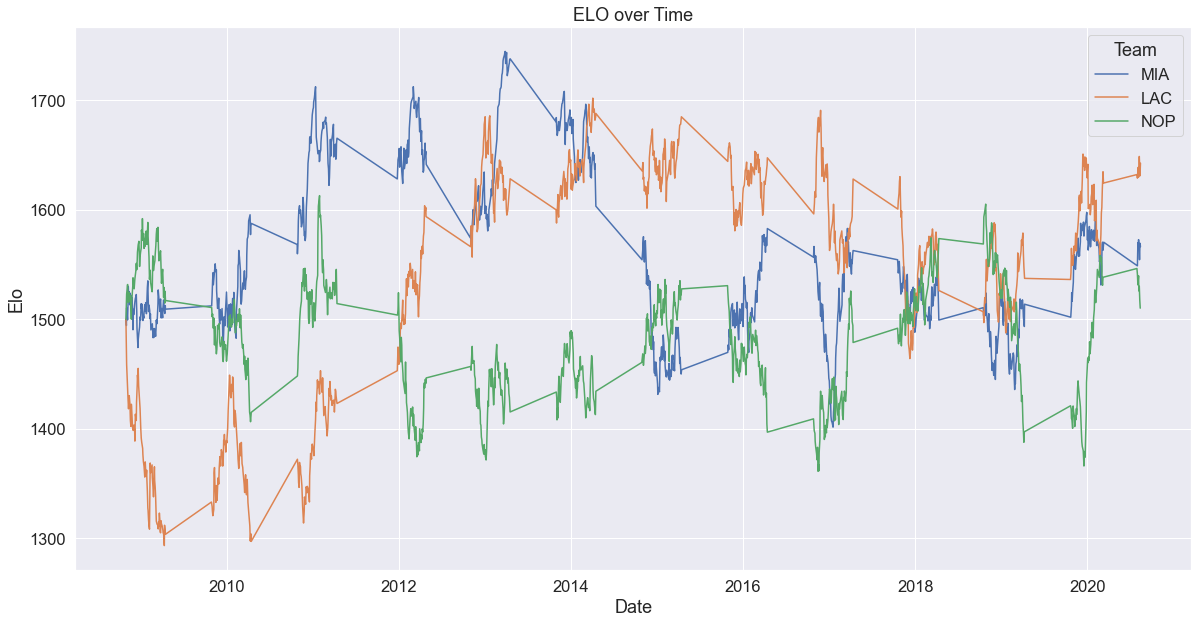

In [71]:
%matplotlib inline
import random

def runningMeanFast(x, N):
    return np.convolve(x, np.ones((N,))/N)[(N-1):]
'''
for index, row in dataset.sample(frac=0.2).iterrows():
  sns.lineplot(data=row, x=dates, y=row.values)

plt.set(xlabel="Dates")
'''
elos = teams_elo_df['Elo'].values
#teams_elo_df['Elo_moving_average'] = runningMeanFast(elos, 15)
plt.figure(figsize=(20,10))
sample_teams = random.sample(list(teams), k=3)
sns.set(font_scale=1.5)
sampled_data = teams_elo_df.loc[teams_elo_df['Team'].isin(sample_teams)]
sns.lineplot(data=sampled_data, x='Date', y='Elo', hue='Team')
plt.title("ELO over Time")

## 2.2 Recent Team Performance 

### Engineering performance stats in ten game windows

In [73]:
#Function that pulls data from n games from dates lesser than game date and averages the stats
def get_avg_stats(team, game_date, team_season_stats, n) :
    prior_games = team_season_stats[team_season_stats['Date'] < game_date][(team_season_stats['H_Team'] == team) | (team_season_stats['A_Team'] == team)].sort_values(by = 'Date').tail(n)
    
    home_df = prior_games.iloc[:, range(3, 53 ,2)]
    home_df.columns = [x[2:] for x in home_df.columns]
    away_df = prior_games.iloc[:, range( 4, 54, 2)]
    away_df.columns = [x[2:] for x in away_df.columns ]
    
    df = pd.concat([home_df, away_df])
    df = df[df['Team']==team]
    df.drop(columns = ['Team'], inplace = True)
    
    return df.mean()

In [74]:
#Recent Performance dataframe for team stats
rp_df = pd.DataFrame()


for Season in team_stats['season'].unique():
    c1 = ['Date', 'GameID', 'season', 'H_Team', 'A_Team']
    c2 = list(team_stats.columns[14:65])
    columns = c1 + c2
    
    team_season_stats = team_stats[cleaned_team_stats['season'] == Season ].sort_values(by='Date')[columns].reset_index(drop = True)
    
    season_recent_performance = pd. DataFrame()
    
    for index, row in team_season_stats.iterrows():
        game_ID = row['GameID']
        game_date = row['Date']
        h_team = row['H_Team']
        a_team = row['A_Team']
        
        h_team_recent_performance = get_avg_stats(h_team, game_date, team_season_stats, 10)
        h_team_recent_performance.index = ['H_Last_10_gm_avg_' + x for x in h_team_recent_performance.index]
        
        a_team_recent_performance = get_avg_stats(a_team, game_date, team_season_stats, 10)
        a_team_recent_performance.index = ['A_Last_10_gm_avg_' + x for x in a_team_recent_performance.index]
        
        nrow = pd.concat([h_team_recent_performance, a_team_recent_performance], sort = False)
        nrow['GameID'] = game_ID
        
        season_recent_performance = season_recent_performance.append(nrow, ignore_index = True)
        season_recent_performance = season_recent_performance[nrow.index]
    
    rp_df = pd.concat([rp_df, season_recent_performance])
    
    



<ipython-input-73-b6402a73a58b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prior_games = team_season_stats[team_season_stats['Date'] < game_date][(team_season_stats['H_Team'] == team) | (team_season_stats['A_Team'] == team)].sort_values(by = 'Date').tail(n)


In [75]:
rp_df.dropna()

,H_Last_10_gm_avg_PTS,H_Last_10_gm_avg_AST,H_Last_10_gm_avg_TO,H_Last_10_gm_avg_Min,H_Last_10_gm_avg_STL,H_Last_10_gm_avg_BLK,H_Last_10_gm_avg_PF,H_Last_10_gm_avg_FGA,H_Last_10_gm_avg_FGMade,H_Last_10_gm_avg_2PA,...,A_Last_10_gm_avg_ORB,A_Last_10_gm_avg_DRB,A_Last_10_gm_avg_TRB,A_Last_10_gm_avg_PTS10,A_Last_10_gm_avg_Ortg,A_Last_10_gm_avg_Drtg,A_Last_10_gm_avg_FGMissed,A_Last_10_gm_avg_2PMissed,A_Last_10_gm_avg_3PMissed,GameID
14,117.0,39.0,13.0,240.0,6.0,7.0,25.0,91.0,44.0,49.0,...,11.0,35.0,46.0,0.0,107.20,113.10,42.0,28.0,14.0,20190321GSW
16,121.0,25.0,20.0,240.0,13.0,1.0,19.0,95.0,49.0,70.0,...,6.0,29.0,35.0,0.0,116.90,124.80,44.0,24.0,20.0,20190321SAC
18,114.0,16.0,9.0,240.0,3.0,2.0,22.0,83.0,36.0,48.0,...,13.0,39.0,52.0,0.0,106.30,116.20,53.0,26.0,27.0,20190321CHO
19,105.0,30.0,19.0,240.0,6.0,1.0,23.0,84.0,39.0,44.0,...,7.0,33.0,40.0,0.0,138.60,117.30,37.0,15.0,22.0,20190321ATL
20,123.0,30.0,17.0,265.0,11.0,5.0,27.0,87.0,45.0,51.0,...,16.0,32.0,48.0,0.0,103.50,111.60,60.0,30.0,30.0,20190322TOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,104.4,25.7,14.2,247.5,9.0,3.9,23.4,85.9,39.9,73.7,...,9.6,33.0,42.6,0.0,107.61,102.02,41.3,29.5,11.8,20090324UTA
1055,107.1,19.1,14.4,245.0,6.5,5.2,19.4,83.9,38.9,67.7,...,15.4,29.9,45.3,0.0,111.94,110.02,47.5,40.8,6.7,20090324CHI
1056,92.5,17.3,15.8,240.0,9.5,4.4,19.9,80.8,35.6,68.3,...,12.1,30.4,42.5,0.0,112.55,108.24,44.0,32.6,11.4,20090324OKC
1057,91.9,19.7,10.8,240.0,6.1,3.8,18.2,79.0,36.1,61.8,...,11.4,32.8,44.2,0.0,109.55,115.57,46.5,34.8,11.7,20090324SAS


## 2.3 Combing Performance Average Stats to Team Stats DF

Create a final_team_stats which combines the data from the recent performance df with the meta data of each game. 

In [77]:
final_team_stats = team_stats.iloc[0 :, [0,1,2,3,6,14,15]].merge(elo_df.drop(columns=['H_Team', 'A_Team']), on = 'GameID') \
.merge(rp_df, on = 'GameID')

In [78]:
final_team_stats = final_team_stats.dropna()

In [123]:
final_team_stats.columns

Index(['Date', 'GameID', 'season', 'H_Team', 'A_Team', 'H_Team_Elo_Before',
       'A_Team_Elo_Before', 'H_Team_Elo_After', 'A_Team_Elo_After',
       'H_Last_10_gm_avg_PTS', 'H_Last_10_gm_avg_AST', 'H_Last_10_gm_avg_TO',
       'H_Last_10_gm_avg_Min', 'H_Last_10_gm_avg_STL', 'H_Last_10_gm_avg_BLK',
       'H_Last_10_gm_avg_PF', 'H_Last_10_gm_avg_FGA',
       'H_Last_10_gm_avg_FGMade', 'H_Last_10_gm_avg_2PA',
       'H_Last_10_gm_avg_2PMade', 'H_Last_10_gm_avg_3PA',
       'H_Last_10_gm_avg_3PMade', 'H_Last_10_gm_avg_FTA',
       'H_Last_10_gm_avg_FTMade', 'H_Last_10_gm_avg_ORB',
       'H_Last_10_gm_avg_DRB', 'H_Last_10_gm_avg_TRB',
       'H_Last_10_gm_avg_PTS10', 'H_Last_10_gm_avg_Ortg',
       'H_Last_10_gm_avg_Drtg', 'H_Last_10_gm_avg_FGMissed',
       'H_Last_10_gm_avg_2PMissed', 'H_Last_10_gm_avg_3PMissed',
       'A_Last_10_gm_avg_PTS', 'A_Last_10_gm_avg_AST', 'A_Last_10_gm_avg_TO',
       'A_Last_10_gm_avg_Min', 'A_Last_10_gm_avg_STL', 'A_Last_10_gm_avg_BLK',
       'A_Last_10

In [80]:
#Merge and organize
h_cols = final_team_stats.columns[final_team_stats.columns.str.startswith('H_')]

team_df = final_team_stats.iloc[0:, [0,1,2,3,4,9,10]].drop(columns = ['H_Team', 'A_Team'])
team_df_h = team_df.drop(columns=team_df.columns[team_df.columns.str.startswith('A_')])
team_df_a = team_df.drop(columns=team_df.columns[team_df.columns.str.startswith('H_')])

recent_perf_h = rp_df.drop(columns = rp_df.columns\
                           [rp_df.columns.str.startswith('A_')])
recent_perf_a = rp_df.drop(columns = rp_df.columns\
                           [rp_df.columns.str.startswith('H_')])

#Combining team_df, teams_elo_df, and recent_perf to create a team by team df. 
tbt_h = team_df_h.merge(teams_elo_df[teams_elo_df.Where_Played == 'Home'], on = 'GameID') \
.merge(recent_perf_h, on ='GameID')

tbt_a = team_df_a.merge(teams_elo_df[teams_elo_df.Where_Played == 'Away'], on = 'GameID') \
.merge(recent_perf_a, on ='GameID')

#Removing 'H_' and 'A_', redundant information in our new df. _x, and _y will appear after first operator and will need to be removed

tbt_h.columns = tbt_h.columns.str.replace('H_', '')
tbt_h.columns = tbt_h.columns.str.replace('_x', '')
tbt_h.columns = tbt_h.columns.str.replace('_y', '')
tbt_a.columns = tbt_a.columns.str.replace('A_', '')
tbt_a.columns = tbt_a.columns.str.replace('_x', '')
tbt_a.columns = tbt_a.columns.str.replace('_y', '')
#Removing any duplicate columns 
tbt_h = tbt_h.loc[:, ~tbt_h.columns.duplicated()]
tbt_a = tbt_a.loc[:, ~tbt_a.columns.duplicated()]

#concating the away and home team by team dataframes by index
final_team_performances_df = pd.concat([tbt_h, tbt_a]).sort_index(axis=0).reset_index().drop(columns=['index'])

In [124]:
final_team_performances_df.columns

Index(['Date', 'GameID', 'season', 'Team_Elo_After', 'Team', 'Elo',
       'Where_Played', 'Last_10_gm_avg_PTS', 'Last_10_gm_avg_AST',
       'Last_10_gm_avg_TO', 'Last_10_gm_avg_Min', 'Last_10_gm_avg_STL',
       'Last_10_gm_avg_BLK', 'Last_10_gm_avg_PF', 'Last_10_gm_avg_FGA',
       'Last_10_gm_avg_FGMade', 'Last_10_gm_avg_2PA', 'Last_10_gm_avg_2PMade',
       'Last_10_gm_avg_3PA', 'Last_10_gm_avg_3PMade', 'Last_10_gm_avg_FTA',
       'Last_10_gm_avg_FTMade', 'Last_10_gm_avg_ORB', 'Last_10_gm_avg_DRB',
       'Last_10_gm_avg_TRB', 'Last_10_gm_avg_PTS10', 'Last_10_gm_avg_Ortg',
       'Last_10_gm_avg_Drtg', 'Last_10_gm_avg_FGMissed',
       'Last_10_gm_avg_2PMissed', 'Last_10_gm_avg_3PMissed', 'Win', 'MED_PER',
       'OPP_MED_PER'],
      dtype='object')

## 2.4 Label Column and Save to CSV

Creating a final "Label" that differentiates between winners and losers for our evaluation. 

In [82]:
final_team_stats['Label'] = [1 if x > 0 else 0 for x in final_team_stats['H_PTS'] - final_team_stats['A_PTS']]

final_team_stats.drop(columns = ['H_PTS', 'A_PTS'], inplace = True)
final_team_stats = final_team_stats.dropna()
final_team_stats.reset_index(drop= True, inplace = True)

combined_df = final_team_stats
final_team_stats

,Date,GameID,season,H_Team,A_Team,H_Team_Elo_Before,A_Team_Elo_Before,H_Team_Elo_After,A_Team_Elo_After,H_Last_10_gm_avg_PTS,...,A_Last_10_gm_avg_ORB,A_Last_10_gm_avg_DRB,A_Last_10_gm_avg_TRB,A_Last_10_gm_avg_PTS10,A_Last_10_gm_avg_Ortg,A_Last_10_gm_avg_Drtg,A_Last_10_gm_avg_FGMissed,A_Last_10_gm_avg_2PMissed,A_Last_10_gm_avg_3PMissed,Label
0,2008-10-30,20081030PHO,2008-09,PHO,NOP,1508.416895,1508.416895,1493.762230,1523.071560,103.0,...,8.0,34.0,42.0,0.0,112.60,107.40,41.0,31.0,10.0,0
1,2008-10-31,20081031PHI,2008-09,PHI,NYK,1486.830104,1505.657856,1505.383439,1487.104521,84.0,...,14.0,32.0,46.0,0.0,116.20,111.40,45.0,29.0,16.0,1
2,2008-10-31,20081031TOR,2008-09,TOR,GSW,1513.169896,1491.583105,1517.801701,1486.951300,95.0,...,11.0,28.0,39.0,0.0,107.40,112.60,46.0,32.0,14.0,1
3,2008-10-31,20081031MIA,2008-09,MIA,SAC,1494.342144,1496.115314,1510.314181,1480.143277,115.0,...,9.0,36.0,45.0,0.0,101.40,103.50,44.0,32.0,12.0,1
4,2008-10-31,20081031BOS,2008-09,BOS,CHI,1505.657856,1509.8509,1517.162690,1498.346066,90.0,...,14.0,26.0,40.0,0.0,120.30,105.80,34.0,27.0,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14134,2020-08-13,20200813BKN,2019-20,BKN,POR,1518.795548,1528.36943,1514.104890,1533.060088,117.9,...,10.2,33.4,43.6,0.0,121.65,120.32,47.3,25.9,21.4,0
14135,2020-08-14,20200814TOR,2019-20,TOR,DEN,1683.137229,1548.559957,1687.014564,1544.682622,111.0,...,9.6,32.8,42.4,0.0,115.95,119.68,44.8,23.8,21.0,1
14136,2020-08-14,20200814IND,2019-20,IND,MIA,1563.263075,1566.395438,1575.196348,1554.462166,110.4,...,7.8,34.5,42.3,0.0,111.90,110.31,44.2,19.4,24.8,1
14137,2020-08-14,20200814LAC,2019-20,LAC,OKC,1642.593683,1586.866995,1646.563430,1582.897248,118.8,...,8.1,33.9,42.0,0.0,110.86,108.43,46.2,25.5,20.7,1


In [83]:
final_team_stats.to_csv('final_team_stats.csv')

## 2.5 Creating Recent Player Performance DataFrame

Like the average team stats per 10 games, we will do the same for the player stats for their previous 10 games

### Read In Player Stats

In [84]:
# We will add a season column for the next two features

playerstats = pd.read_csv('Cleaned_Player_Stats.csv', index_col = 0)
playerstats = playerstats.sort_values(by='Date').reset_index(drop = True)
IDseason = team_stats[['season', 'GameID']].drop_duplicates()
playerstats.rename(columns={'gameID': 'GameID'}, inplace=True)
IDseason.head()

,season,GameID
0,2008-09,20081028BOS
1,2008-09,20081028CHI
2,2008-09,20081028LAL
3,2008-09,20081029PHI
4,2008-09,20081029WAS


In [88]:
playerstats = pd.merge(playerstats, IDseason , left_on='GameID', right_on='GameID', how = 'left')

In [89]:
playerstats.head()

,GameID,Player,Team,Against,Date,MP,FG,FGA,FGM,3P,...,TRB,AST,STL,BLK,TOV,PF,PTS,+/-,Teamabbr,season
0,20081028BOS,LeBron James,Cleveland Cavaliers,Boston Celtics,2008-10-28,36.00,9.0,21.0,12.0,0.0,...,7.0,6.0,2.0,1.0,3.0,4.0,22.0,-3.0,CLE,2008-09
1,20081028BOS,Zydrunas Ilgauskas,Cleveland Cavaliers,Boston Celtics,2008-10-28,30.24,3.0,5.0,2.0,0.0,...,8.0,1.0,0.0,0.0,4.0,3.0,15.0,7.0,CLE,2008-09
2,20081028BOS,Ben Wallace,Cleveland Cavaliers,Boston Celtics,2008-10-28,19.03,1.0,1.0,0.0,0.0,...,4.0,0.0,0.0,1.0,1.0,2.0,2.0,-1.0,CLE,2008-09
3,20081028BOS,Anderson Varejão,Cleveland Cavaliers,Boston Celtics,2008-10-28,26.09,3.0,6.0,3.0,0.0,...,9.0,1.0,3.0,0.0,2.0,2.0,9.0,-7.0,CLE,2008-09
4,20081028BOS,Daniel Gibson,Cleveland Cavaliers,Boston Celtics,2008-10-28,22.38,2.0,8.0,6.0,0.0,...,3.0,3.0,0.0,0.0,0.0,1.0,6.0,-8.0,CLE,2008-09


### Define Function For Player Average Stats Per Game

In [90]:
def rolling_average_last_n_games(n):
    playerstats_recent = pd.DataFrame()
    
    for season in playerstats['season'].unique():
        season_stats = playerstats[playerstats['season']==season]
        
        for player in season_stats['Player'].unique():
            player_performance = season_stats[season_stats['Player']==player].rolling(n, min_periods=1).mean().shift(1)
            
            playerstats_recent = playerstats_recent.append(player_performance, ignore_index = False)
        
        #renaming columns to reflect 10 game avg
        playerstats_recent.columns = ['Last_' + str(n) + '_Avg_' + x for x in playerstats_recent.columns]
        #merging playerstats to playerstats_recent and at the same time removing the redundent current game avg stats.
        playerstats_recent = playerstats[['Player', 'GameID']].merge(playerstats_recent,left_index=True, right_index=True)
        
        return playerstats_recent

In [91]:
player_recent_performance = rolling_average_last_n_games(10)

player_recent_performance

,Player,GameID,Last_10_Avg_MP,Last_10_Avg_FG,Last_10_Avg_FGA,Last_10_Avg_FGM,Last_10_Avg_3P,Last_10_Avg_3PA,Last_10_Avg_FT,Last_10_Avg_FTA,...,Last_10_Avg_FTM,Last_10_Avg_DRB,Last_10_Avg_TRB,Last_10_Avg_AST,Last_10_Avg_STL,Last_10_Avg_BLK,Last_10_Avg_TOV,Last_10_Avg_PF,Last_10_Avg_PTS,Last_10_Avg_+/-
0,LeBron James,20081028BOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Zydrunas Ilgauskas,20081028BOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ben Wallace,20081028BOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Anderson Varejão,20081028BOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Daniel Gibson,20081028BOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23956,Rudy Fernández,20090415POR,24.106,3.8,7.9,4.1,2.3,4.7,1.5,2.2,...,0.7,1.8,2.0,1.7,1.4,0.1,0.7,1.5,11.4,8.2
23957,Nicolas Batum,20090415POR,20.826,2.5,4.8,2.3,0.9,1.7,0.5,0.5,...,0.0,1.2,3.0,0.8,0.5,0.4,0.3,1.5,6.4,4.9
23958,Joel Przybilla,20090415POR,24.560,1.7,3.4,1.7,0.0,0.0,1.3,1.5,...,0.2,7.3,9.9,0.4,0.4,1.2,1.1,2.3,4.7,12.2
23959,Brandon Roy,20090415POR,33.950,7.7,14.9,7.2,1.3,3.2,5.1,6.5,...,1.4,3.6,4.7,5.2,1.3,0.4,2.3,1.5,21.8,15.2


## 2.6 Player Season Average Performance

Having completed their recent average, we will also compare it to their season average, as players play, their performances do shift, but most of the time they will revert to average.

In [92]:
avg_season_stats = pd.DataFrame()

for season in playerstats['season'].unique():
    season_playerstats = playerstats[playerstats['season']==season]
    for player in season_playerstats['Player'].unique():
        #.expanding() similar to rolling, but rolling sets window length, where expanding is set to variable that changes its window size depending on variable
        player_season_avg = season_playerstats[season_playerstats['Player']==player].expanding().mean().shift(1)
        
        avg_season_stats = avg_season_stats.append(player_season_avg, ignore_index = False)
    
avg_season_stats.columns = ['Avg_season_' + x for x in avg_season_stats.columns]
avg_season_stats = playerstats.iloc[:, [0, 1, 2, 3, 21, 22]].merge(avg_season_stats, left_index = True, right_index=True)


In [93]:
avg_season_stats.drop(columns = 'GameID', inplace = True)
avg_season_stats

,Player,Team,Against,PF,PTS,Avg_season_MP,Avg_season_FG,Avg_season_FGA,Avg_season_FGM,Avg_season_3P,...,Avg_season_FTM,Avg_season_DRB,Avg_season_TRB,Avg_season_AST,Avg_season_STL,Avg_season_BLK,Avg_season_TOV,Avg_season_PF,Avg_season_PTS,Avg_season_+/-
0,LeBron James,Cleveland Cavaliers,Boston Celtics,4.0,22.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Zydrunas Ilgauskas,Cleveland Cavaliers,Boston Celtics,3.0,15.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ben Wallace,Cleveland Cavaliers,Boston Celtics,2.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Anderson Varejão,Cleveland Cavaliers,Boston Celtics,2.0,9.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Daniel Gibson,Cleveland Cavaliers,Boston Celtics,1.0,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290934,Chris Clemons,Houston Rockets,Philadelphia 76ers,4.0,4.0,8.335625,1.718750,4.218750,2.500000,1.156250,...,0.031250,0.781250,0.906250,0.718750,0.250000,0.156250,0.562500,0.687500,4.906250,-1.218750
290935,Luc Mbah a Moute,Houston Rockets,Philadelphia 76ers,0.0,3.0,5.205000,0.500000,1.000000,0.500000,0.000000,...,0.000000,0.000000,0.500000,0.000000,1.000000,0.000000,0.500000,0.000000,1.000000,3.500000
290936,Austin Rivers,Houston Rockets,Philadelphia 76ers,0.0,1.0,23.405075,3.149254,7.447761,4.298507,1.432836,...,0.477612,2.194030,2.597015,1.686567,0.716418,0.149254,0.731343,1.925373,8.880597,1.447761
290937,James Harden,Houston Rockets,Philadelphia 76ers,1.0,27.0,36.479851,9.895522,22.358209,12.462687,4.402985,...,1.611940,5.567164,6.611940,7.492537,1.850746,0.865672,4.492537,3.373134,34.447761,4.402985


## 2.7 Combine the extracted player stats features into final_player_stats

In [94]:
final_player_stats = avg_season_stats.merge(player_recent_performance.drop(columns=['GameID','Player']), left_index=True, right_index=True)
final_player_stats = final_player_stats.dropna()

In [95]:
final_player_stats.to_csv('final_player_stats.csv')

## 2.8 Final Data Display

In [96]:
final_team_stats

,Date,GameID,season,H_Team,A_Team,H_Team_Elo_Before,A_Team_Elo_Before,H_Team_Elo_After,A_Team_Elo_After,H_Last_10_gm_avg_PTS,...,A_Last_10_gm_avg_ORB,A_Last_10_gm_avg_DRB,A_Last_10_gm_avg_TRB,A_Last_10_gm_avg_PTS10,A_Last_10_gm_avg_Ortg,A_Last_10_gm_avg_Drtg,A_Last_10_gm_avg_FGMissed,A_Last_10_gm_avg_2PMissed,A_Last_10_gm_avg_3PMissed,Label
0,2008-10-30,20081030PHO,2008-09,PHO,NOP,1508.416895,1508.416895,1493.762230,1523.071560,103.0,...,8.0,34.0,42.0,0.0,112.60,107.40,41.0,31.0,10.0,0
1,2008-10-31,20081031PHI,2008-09,PHI,NYK,1486.830104,1505.657856,1505.383439,1487.104521,84.0,...,14.0,32.0,46.0,0.0,116.20,111.40,45.0,29.0,16.0,1
2,2008-10-31,20081031TOR,2008-09,TOR,GSW,1513.169896,1491.583105,1517.801701,1486.951300,95.0,...,11.0,28.0,39.0,0.0,107.40,112.60,46.0,32.0,14.0,1
3,2008-10-31,20081031MIA,2008-09,MIA,SAC,1494.342144,1496.115314,1510.314181,1480.143277,115.0,...,9.0,36.0,45.0,0.0,101.40,103.50,44.0,32.0,12.0,1
4,2008-10-31,20081031BOS,2008-09,BOS,CHI,1505.657856,1509.8509,1517.162690,1498.346066,90.0,...,14.0,26.0,40.0,0.0,120.30,105.80,34.0,27.0,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14134,2020-08-13,20200813BKN,2019-20,BKN,POR,1518.795548,1528.36943,1514.104890,1533.060088,117.9,...,10.2,33.4,43.6,0.0,121.65,120.32,47.3,25.9,21.4,0
14135,2020-08-14,20200814TOR,2019-20,TOR,DEN,1683.137229,1548.559957,1687.014564,1544.682622,111.0,...,9.6,32.8,42.4,0.0,115.95,119.68,44.8,23.8,21.0,1
14136,2020-08-14,20200814IND,2019-20,IND,MIA,1563.263075,1566.395438,1575.196348,1554.462166,110.4,...,7.8,34.5,42.3,0.0,111.90,110.31,44.2,19.4,24.8,1
14137,2020-08-14,20200814LAC,2019-20,LAC,OKC,1642.593683,1586.866995,1646.563430,1582.897248,118.8,...,8.1,33.9,42.0,0.0,110.86,108.43,46.2,25.5,20.7,1


In [97]:
final_player_stats

,Player,Team,Against,PF,PTS,Avg_season_MP,Avg_season_FG,Avg_season_FGA,Avg_season_FGM,Avg_season_3P,...,Last_10_Avg_FTM,Last_10_Avg_DRB,Last_10_Avg_TRB,Last_10_Avg_AST,Last_10_Avg_STL,Last_10_Avg_BLK,Last_10_Avg_TOV,Last_10_Avg_PF,Last_10_Avg_PTS,Last_10_Avg_+/-
120,Dan Gadzuric,Milwaukee Bucks,Oklahoma City Thunder,1.0,5.0,14.330000,3.000000,3.000000,0.000000,0.000000,...,0.0,1.0,3.0,1.0,1.0,0.0,2.0,2.0,6.0,-11.0
157,Richard Jefferson,Milwaukee Bucks,Oklahoma City Thunder,3.0,20.0,38.190000,5.000000,17.000000,12.000000,2.000000,...,1.0,4.0,4.0,2.0,0.0,0.0,2.0,4.0,15.0,-4.0
158,Charlie Villanueva,Milwaukee Bucks,Oklahoma City Thunder,6.0,20.0,8.470000,1.000000,5.000000,4.000000,0.000000,...,0.0,1.0,3.0,1.0,0.0,0.0,1.0,3.0,4.0,3.0
159,Michael Redd,Milwaukee Bucks,Oklahoma City Thunder,0.0,20.0,38.280000,10.000000,19.000000,9.000000,4.000000,...,2.0,1.0,2.0,1.0,1.0,0.0,2.0,4.0,30.0,-5.0
160,Andrew Bogut,Milwaukee Bucks,Oklahoma City Thunder,4.0,14.0,25.570000,4.000000,4.000000,0.000000,0.000000,...,1.0,4.0,7.0,0.0,1.0,1.0,3.0,4.0,9.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23956,Rudy Fernández,Portland Trail Blazers,Denver Nuggets,4.0,18.0,25.091081,3.364865,7.959459,4.594595,1.959459,...,0.7,1.8,2.0,1.7,1.4,0.1,0.7,1.5,11.4,8.2
23957,Nicolas Batum,Portland Trail Blazers,Denver Nuggets,2.0,3.0,18.193600,2.040000,4.533333,2.493333,0.786667,...,0.0,1.2,3.0,0.8,0.5,0.4,0.3,1.5,6.4,4.9
23958,Joel Przybilla,Portland Trail Blazers,Denver Nuggets,2.0,6.0,23.615256,2.012821,3.256410,1.243590,0.000000,...,0.2,7.3,9.9,0.4,0.4,1.2,1.1,2.3,4.7,12.2
23959,Brandon Roy,Portland Trail Blazers,Denver Nuggets,1.0,6.0,36.825405,8.175676,16.824324,8.648649,1.081081,...,1.4,3.6,4.7,5.2,1.3,0.4,2.3,1.5,21.8,15.2


In [98]:
final_team_performances_df

,Date,GameID,season,Team_Elo_After,Team,Elo,Where_Played,Last_10_gm_avg_PTS,Last_10_gm_avg_AST,Last_10_gm_avg_TO,...,Last_10_gm_avg_FTMade,Last_10_gm_avg_ORB,Last_10_gm_avg_DRB,Last_10_gm_avg_TRB,Last_10_gm_avg_PTS10,Last_10_gm_avg_Ortg,Last_10_gm_avg_Drtg,Last_10_gm_avg_FGMissed,Last_10_gm_avg_2PMissed,Last_10_gm_avg_3PMissed
0,2008-10-30,20081030PHO,2008-09,1493.762230,PHO,1508.416895,Home,103.0,24.0,10.0,...,19.0,9.0,30.0,39.0,0.0,116.60,110.90,40.0,31.0,9.0
1,2008-10-30,20081030PHO,2008-09,1523.071560,NOP,1508.416895,Away,108.0,23.0,13.0,...,19.0,8.0,34.0,42.0,0.0,112.60,107.40,41.0,31.0,10.0
2,2008-10-31,20081031PHI,2008-09,1505.383439,PHI,1486.830104,Home,84.0,15.0,17.0,...,21.0,23.0,33.0,56.0,0.0,99.80,112.80,55.0,40.0,15.0
3,2008-10-31,20081031PHI,2008-09,1487.104521,NYK,1505.657856,Away,120.0,27.0,15.0,...,27.0,14.0,32.0,46.0,0.0,116.20,111.40,45.0,29.0,16.0
4,2008-10-31,20081031TOR,2008-09,1517.801701,TOR,1513.169896,Home,95.0,24.0,9.0,...,13.0,10.0,23.0,33.0,0.0,112.80,99.80,45.0,39.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28273,2020-08-14,20200814IND,2019-20,1575.196348,IND,1563.263075,Home,110.4,24.0,13.6,...,15.5,7.7,34.9,42.6,0.0,109.28,108.60,45.8,27.3,18.5
28274,2020-08-14,20200814LAC,2019-20,1582.897248,OKC,1586.866995,Away,110.3,21.1,14.0,...,19.9,8.1,33.9,42.0,0.0,110.86,108.43,46.2,25.5,20.7
28275,2020-08-14,20200814LAC,2019-20,1646.563430,LAC,1642.593683,Home,118.8,22.1,11.6,...,21.7,8.9,36.5,45.4,0.0,120.43,112.98,45.0,23.0,22.0
28276,2020-08-14,20200814HOU,2019-20,1534.811696,HOU,1569.491973,Home,114.8,22.4,15.4,...,21.3,6.9,33.0,39.9,0.0,108.75,110.06,48.9,16.0,32.9


In [99]:
final_team_performances_df.columns

Index(['Date', 'GameID', 'season', 'Team_Elo_After', 'Team', 'Elo',
       'Where_Played', 'Last_10_gm_avg_PTS', 'Last_10_gm_avg_AST',
       'Last_10_gm_avg_TO', 'Last_10_gm_avg_Min', 'Last_10_gm_avg_STL',
       'Last_10_gm_avg_BLK', 'Last_10_gm_avg_PF', 'Last_10_gm_avg_FGA',
       'Last_10_gm_avg_FGMade', 'Last_10_gm_avg_2PA', 'Last_10_gm_avg_2PMade',
       'Last_10_gm_avg_3PA', 'Last_10_gm_avg_3PMade', 'Last_10_gm_avg_FTA',
       'Last_10_gm_avg_FTMade', 'Last_10_gm_avg_ORB', 'Last_10_gm_avg_DRB',
       'Last_10_gm_avg_TRB', 'Last_10_gm_avg_PTS10', 'Last_10_gm_avg_Ortg',
       'Last_10_gm_avg_Drtg', 'Last_10_gm_avg_FGMissed',
       'Last_10_gm_avg_2PMissed', 'Last_10_gm_avg_3PMissed'],
      dtype='object')

# Section 3: Exploratory Data Analysis

## Build Win/Lose label for Team Performances DF

Adding win columns for the team_final_performances_df similar to final_team_stats

In [100]:
labels = [] 

#choose the specific row
for i, row in combined_df.iterrows():
    game_id = row['GameID']
    win = row['Label']
    tp_row = final_team_performances_df.loc[final_team_performances_df['GameID']==game_id]
    #iterate through each specific row to see if the home team won or lose, append to labels list
    for j, r in tp_row.iterrows(): 
        if r['Where_Played'] == 'Home' and win==0:
            labels.append(0)
        elif r['Where_Played'] == 'Away' and win==1:
            labels.append(0)
        else:
            labels.append(1)
#set win column to our labels list             
final_team_performances_df['Win'] = labels

final_team_performances_df['Date'] = pd.to_datetime(final_team_performances_df['Date'])
final_team_performances_df.sort_values(by=['Date'], inplace=True, ascending=True)

In [101]:
final_team_performances_df.head()

,Date,GameID,season,Team_Elo_After,Team,Elo,Where_Played,Last_10_gm_avg_PTS,Last_10_gm_avg_AST,Last_10_gm_avg_TO,...,Last_10_gm_avg_ORB,Last_10_gm_avg_DRB,Last_10_gm_avg_TRB,Last_10_gm_avg_PTS10,Last_10_gm_avg_Ortg,Last_10_gm_avg_Drtg,Last_10_gm_avg_FGMissed,Last_10_gm_avg_2PMissed,Last_10_gm_avg_3PMissed,Win
0,2008-10-30,20081030PHO,2008-09,1493.762230,PHO,1508.416895,Home,103.0,24.0,10.0,...,9.0,30.0,39.0,0.0,116.6,110.9,40.0,31.0,9.0,0
1,2008-10-30,20081030PHO,2008-09,1523.071560,NOP,1508.416895,Away,108.0,23.0,13.0,...,8.0,34.0,42.0,0.0,112.6,107.4,41.0,31.0,10.0,1
15,2008-10-31,20081031POR,2008-09,1490.146208,POR,1486.830715,Home,76.0,19.0,12.0,...,13.0,31.0,44.0,0.0,85.3,107.7,55.0,41.0,14.0,1
13,2008-10-31,20081031LAC,2008-09,1506.380230,DEN,1494.915382,Away,94.0,17.0,13.0,...,7.0,28.0,35.0,0.0,100.8,105.1,41.0,32.0,9.0,1
12,2008-10-31,20081031LAC,2008-09,1458.693740,LAC,1470.158588,Home,79.0,24.0,18.0,...,10.0,22.0,32.0,0.0,84.4,125.0,48.0,31.0,17.0,0


### Separate and Review Performance Data According to Winners and Losers

/Users/Shawn/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Shawn/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Shawn/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

/Users/Shawn/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Shawn/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Shawn/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

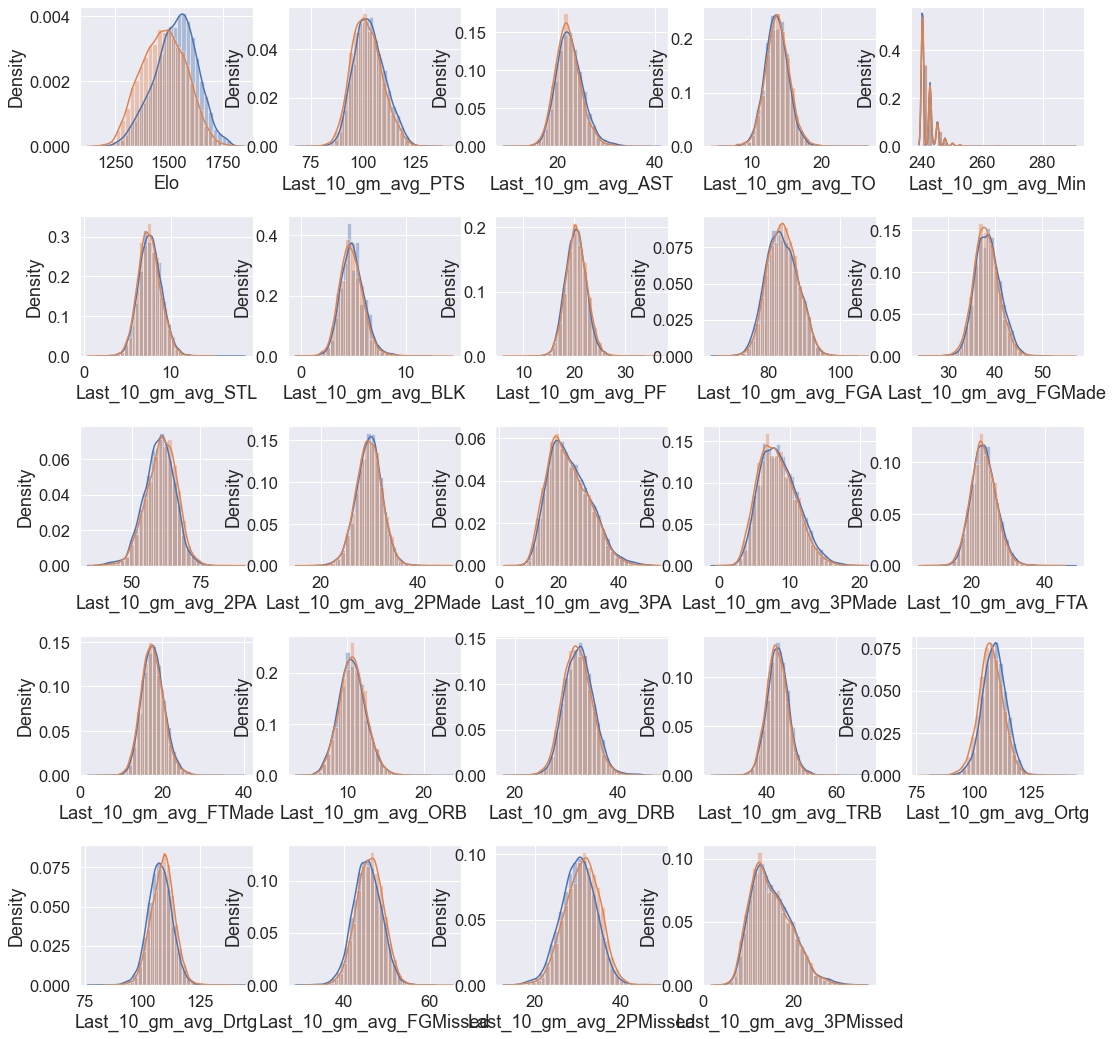

In [102]:
winners = final_team_performances_df[final_team_performances_df['Win']==1]
losers = final_team_performances_df[final_team_performances_df['Win']==0]

cols = ['Elo','Last_10_gm_avg_PTS', 'Last_10_gm_avg_AST',
       'Last_10_gm_avg_TO', 'Last_10_gm_avg_Min', 'Last_10_gm_avg_STL',
       'Last_10_gm_avg_BLK', 'Last_10_gm_avg_PF', 'Last_10_gm_avg_FGA',
       'Last_10_gm_avg_FGMade', 'Last_10_gm_avg_2PA', 'Last_10_gm_avg_2PMade',
       'Last_10_gm_avg_3PA', 'Last_10_gm_avg_3PMade', 'Last_10_gm_avg_FTA',
       'Last_10_gm_avg_FTMade', 'Last_10_gm_avg_ORB', 'Last_10_gm_avg_DRB',
       'Last_10_gm_avg_TRB', 'Last_10_gm_avg_Ortg',
       'Last_10_gm_avg_Drtg', 'Last_10_gm_avg_FGMissed',
       'Last_10_gm_avg_2PMissed', 'Last_10_gm_avg_3PMissed']

windata=winners[cols]
losedata=losers[cols]


fig = plt.figure()
j = 1 
fig.set_size_inches(18, 18)

for i in windata.columns:
    ax = fig.add_subplot(5, 5, j)
    sns.distplot(a=windata[i], bins=30, hist=True, ax=ax)
    sns.distplot(a=losedata[i], bins=30, hist=True, ax=ax)
    j += 1

fig.subplots_adjust(hspace=.5)
plt.show()

Comparing statistics between winners and losers, it's clear that the ELO has a strong correlation for differentiating the two. Another stat that showed good differentiation is Offensive rating (scoring per 100 possession), and defensive rating (Stls*Blocks+Opponent Possession Differential). These features summarize the teams offensive and defensive efficiencies, and makes sense that they show some correlation to differentiating winners and losers.

We will explore Player Efficiency Ratings and see whether that would support our above hypothesis. 

## 3.2 Exploring ELO Density through the NBA

Exploring the ELO rankings throughout the NBA on a per-season basis, this can give us some ideas how the teams strengths are distributed thoughout the league. Seasons that contain skewered data will most likely imply that team strength are inbalanced. 

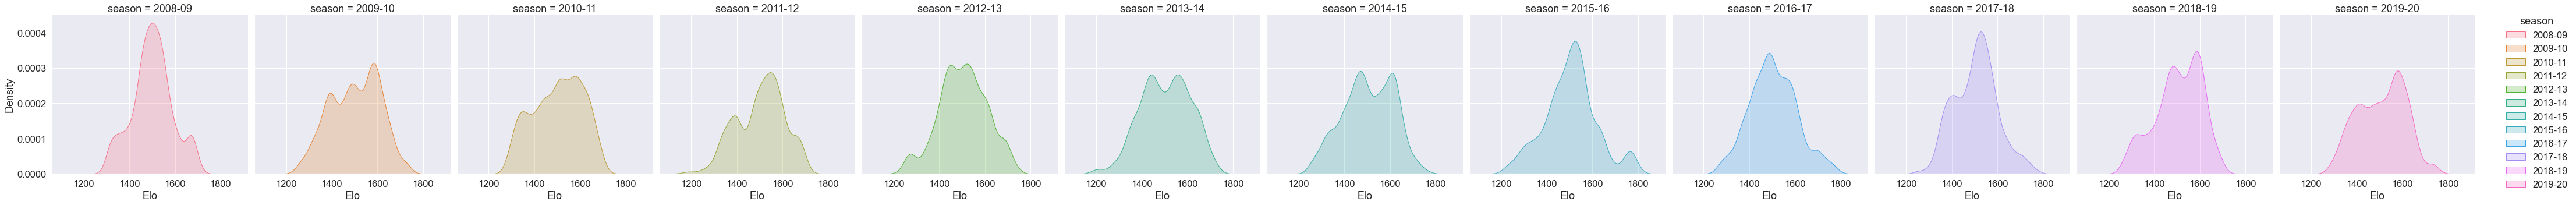

In [103]:
%matplotlib inline

#Flexibly plot a univariate distribution of observations. https://seaborn.pydata.org/generated/seaborn.distplot.html
sns.displot(final_team_performances_df, x='Elo', hue='season', col='season', kind ='kde', fill = True, height = 5)

## 3.3 Examining ELO per team



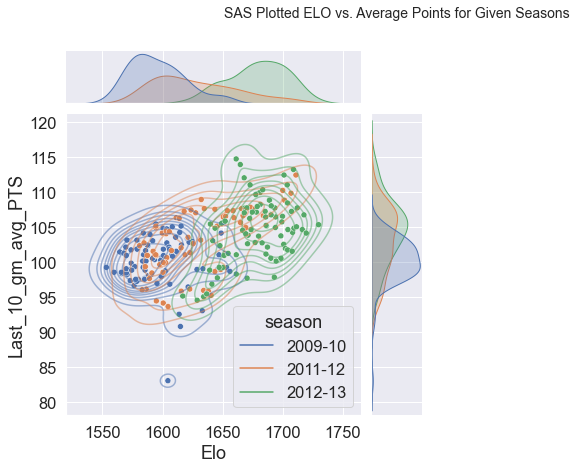

In [104]:
#create datafr'ame of just the randomly chosen teams
random_team = random.choice(teams)
data = final_team_performances_df[final_team_performances_df['Team']==random_team]
random_seasons = np.random.choice(list(set(final_team_performances_df['season'].values)), size=3, replace= False)
data=data[data['season'].isin(random_seasons)]

#plot ELO vs average points we can see how relevant the two variables are together. 
#seaborn.jointplot - Draw a plot of two variables with bivariate and univariate graphs.
graph = sns.jointplot(data = data, x='Elo', y='Last_10_gm_avg_PTS', hue='season', height = 6)
plt.title('{} Plotted ELO vs. Average Points for Given Seasons'.format(random_team), y=1.3, fontsize = 14)
graph.plot_joint(sns.kdeplot, alpha=0.5)

The plot shows consistently a positive correlation incating the higher the teams avg points over the 10 game window the higher their reflective ELO 

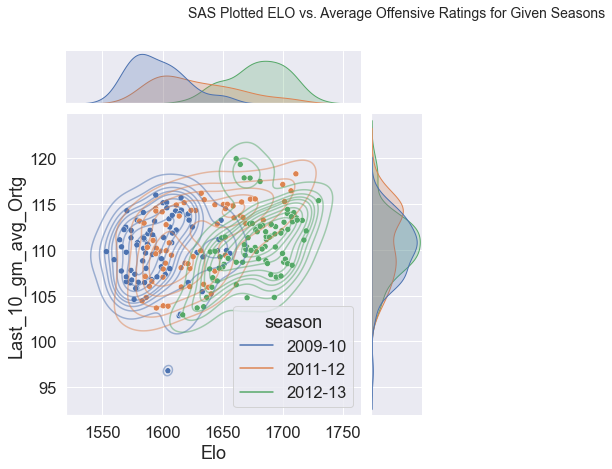

In [105]:
#Plot ELO vs. Offensive Rating
graph = sns.jointplot(data = data, x='Elo', y='Last_10_gm_avg_Ortg', hue='season', height = 6)
plt.title('{} Plotted ELO vs. Average Offensive Ratings for Given Seasons'.format(random_team), y=1.3, fontsize = 14)
graph.plot_joint(sns.kdeplot, alpha=0.5)

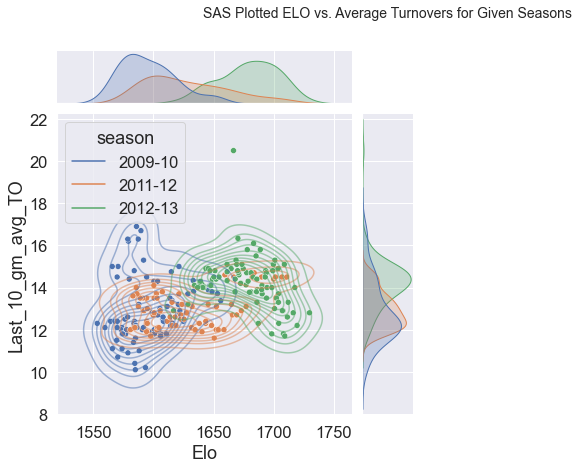

In [106]:
#Hypothesis: What about other stats such as Turnovers made vs. ELO
graph = sns.jointplot(data = data, x='Elo', y='Last_10_gm_avg_TO', hue='season', height = 6)
plt.title('{} Plotted ELO vs. Average Turnovers for Given Seasons'.format(random_team), y=1.3, fontsize = 14)
graph.plot_joint(sns.kdeplot, alpha=0.5)

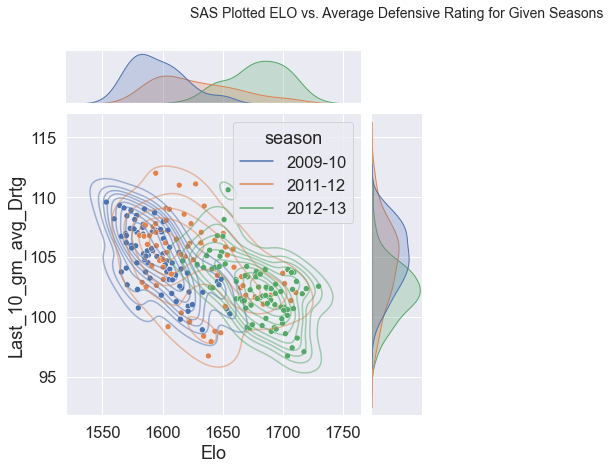

In [107]:
graph = sns.jointplot(data = data, x='Elo', y='Last_10_gm_avg_Drtg', hue='season', height = 6)
plt.title('{} Plotted ELO vs. Average Defensive Rating for Given Seasons'.format(random_team), y=1.3, fontsize = 14)
graph.plot_joint(sns.kdeplot, alpha=0.5)

Negative stats such as turnovers (mistakes) generally do reflect negatively, the lower the negative stat the higher the ELO rating. However, similar to Defensive rating, defensive stats correlation behaviour isn't as obvious as PTS vs. ELO, or the Offensive rating vs. ELO.

This could be summarize such that such ELO is highly selective of winning stats, and the essence of winning a basketball is getting buckets. 

## 3.4 Exploring Team ELO to Team Average PER

Building on our hyposthesis that efficency ratings can be helpful or provides more insightful relationships in our data, the PER is an advanced statistic that is utilized widely in the modern NBA analysis. PER essentially rewards positive stats such as scoring, rebounding and penalizes negative stats such TOs, fouls, and missed shots. This stat would allow us to sum up each players performance and test whether the players performance efficiency helps with winning leading to high team ELO. 

https://bleacherreport.com/articles/113144-cracking-the-code-how-to-calculate-hollingers-per-without-all-the-mess

In [108]:
player_stats['PER_Stub'] = player_stats['FG']*85.910+player_stats['STL']*53.897+player_stats['3P']*51.757+ \
player_stats['FT']*46.845+player_stats['BLK']*39.190+player_stats['ORB']*39.19+player_stats['AST']*34.677+ \
player_stats['DRB']*14.707-player_stats['PF']*17.174-player_stats['FTM']*20.091-player_stats['FGM']*39.190- \
player_stats['TOV']*53.897

In [109]:
player_stats['PER_Stub'].describe()

count    290939.000000
mean        365.871492
std         353.428143
min        -538.291000
25%          89.398500
50%         300.995000
75%         576.012000
max        2764.687000
Name: PER_Stub, dtype: float64

In [110]:
player_stats['PER'] = player_stats['PER_Stub'] * (1/ player_stats['MP'])

In [111]:
player_stats['PER'].describe()

count    290939.000000
mean         14.085627
std          34.898049
min       -3919.000000
25%           5.641778
50%          14.039247
75%          22.405314
max        9369.000000
Name: PER, dtype: float64

In [112]:
player_stats[['MP', 'PER']][player_stats['PER']<-36].describe()

,MP,PER
count,1188.000000,1188.000000
mean,1.633451,-106.828998
std,1.352370,277.456913
min,0.010000,-3919.000000
25%,0.520000,-77.815909
50%,1.320000,-49.727582
75%,2.320000,-40.250410
max,9.260000,-36.020221


#Mean vs. Median

We can see that due to the way the PER is calculated, players that sometime do not play many minutes and only racked up negative scores, their PER's are incredibly large in the negative direction. If we are using a Mean calculation for the team average PER, these large negative numbers will skewer the mean. Because the impact from a minutes standpoint on court is quite neglegible, it would more accurately reflect the team average performance efficiency if we used a median team PER. 

In [113]:
#Compare ELO to Team Median PER
team_per = []
opp_per = []
for i, row in data.iterrows():
    game_id = row['GameID']
    stub_rows = player_stats[player_stats['gameID']== game_id]
    team_rows = stub_rows[stub_rows['Teamabbr'] == random_team]
    opp_rows = stub_rows[stub_rows['Teamabbr'] != random_team]
    
    team_per.append(np.median(team_rows['PER'].values))
    opp_per.append(np.median(opp_rows['PER'].values))

data['MED_PER'] = team_per
data['OPP_MED_PER'] = opp_per

/Users/Shawn/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/Shawn/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


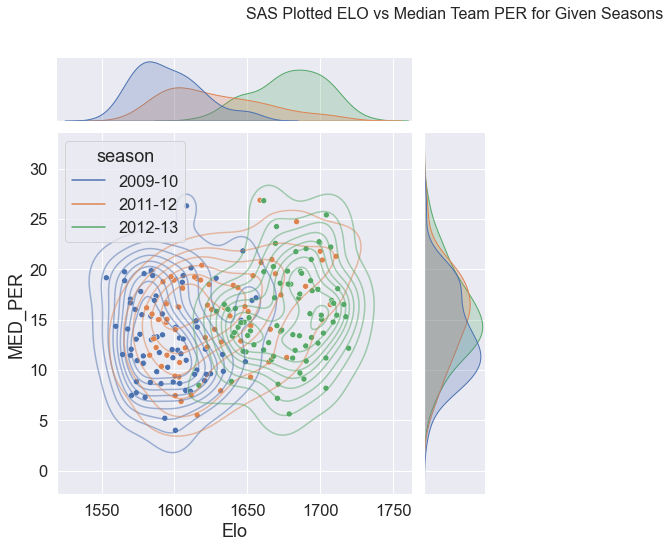

In [114]:
g = sns.jointplot(data = data, x="Elo", y="MED_PER", hue="season", height=7)
plt.title("{} Plotted ELO vs Median Team PER for Given Seasons".format(random_team), y=1.3, fontsize = 16)
g.plot_joint(sns.kdeplot, alpha=0.5)

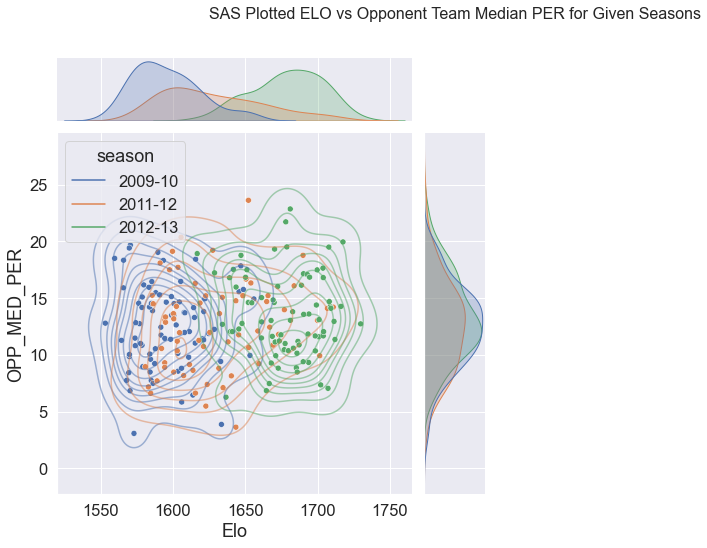

In [115]:
g = sns.jointplot(data = data, x="Elo", y="OPP_MED_PER", hue="season", height=7)
plt.title("{} Plotted ELO vs Opponent Team Median PER for Given Seasons".format(random_team), y=1.3, fontsize = 16)
g.plot_joint(sns.kdeplot, alpha=0.5)

Unlike our hypothesis where efficiency statistics being good features, we can see that the median PER doesn't exactly show a strong correlation with ELO.

*Potential area for future analysis, gather additional data that describes the individual players offensive rating and defensive rating. These are calculated features based on data that was partially unavailable in our current dataset. 

## 3.5 Building Features Heat Map With Team Performance DF including PER

The numerical portion of our data fortunately do not require normalization or standardization. By incorporating a heat map we can see how correlated the features are to some of the key features such as ELO and PER. 

Text(0.5, 1.0, 'SAS Team Performance Feature Correlation Heat Map')

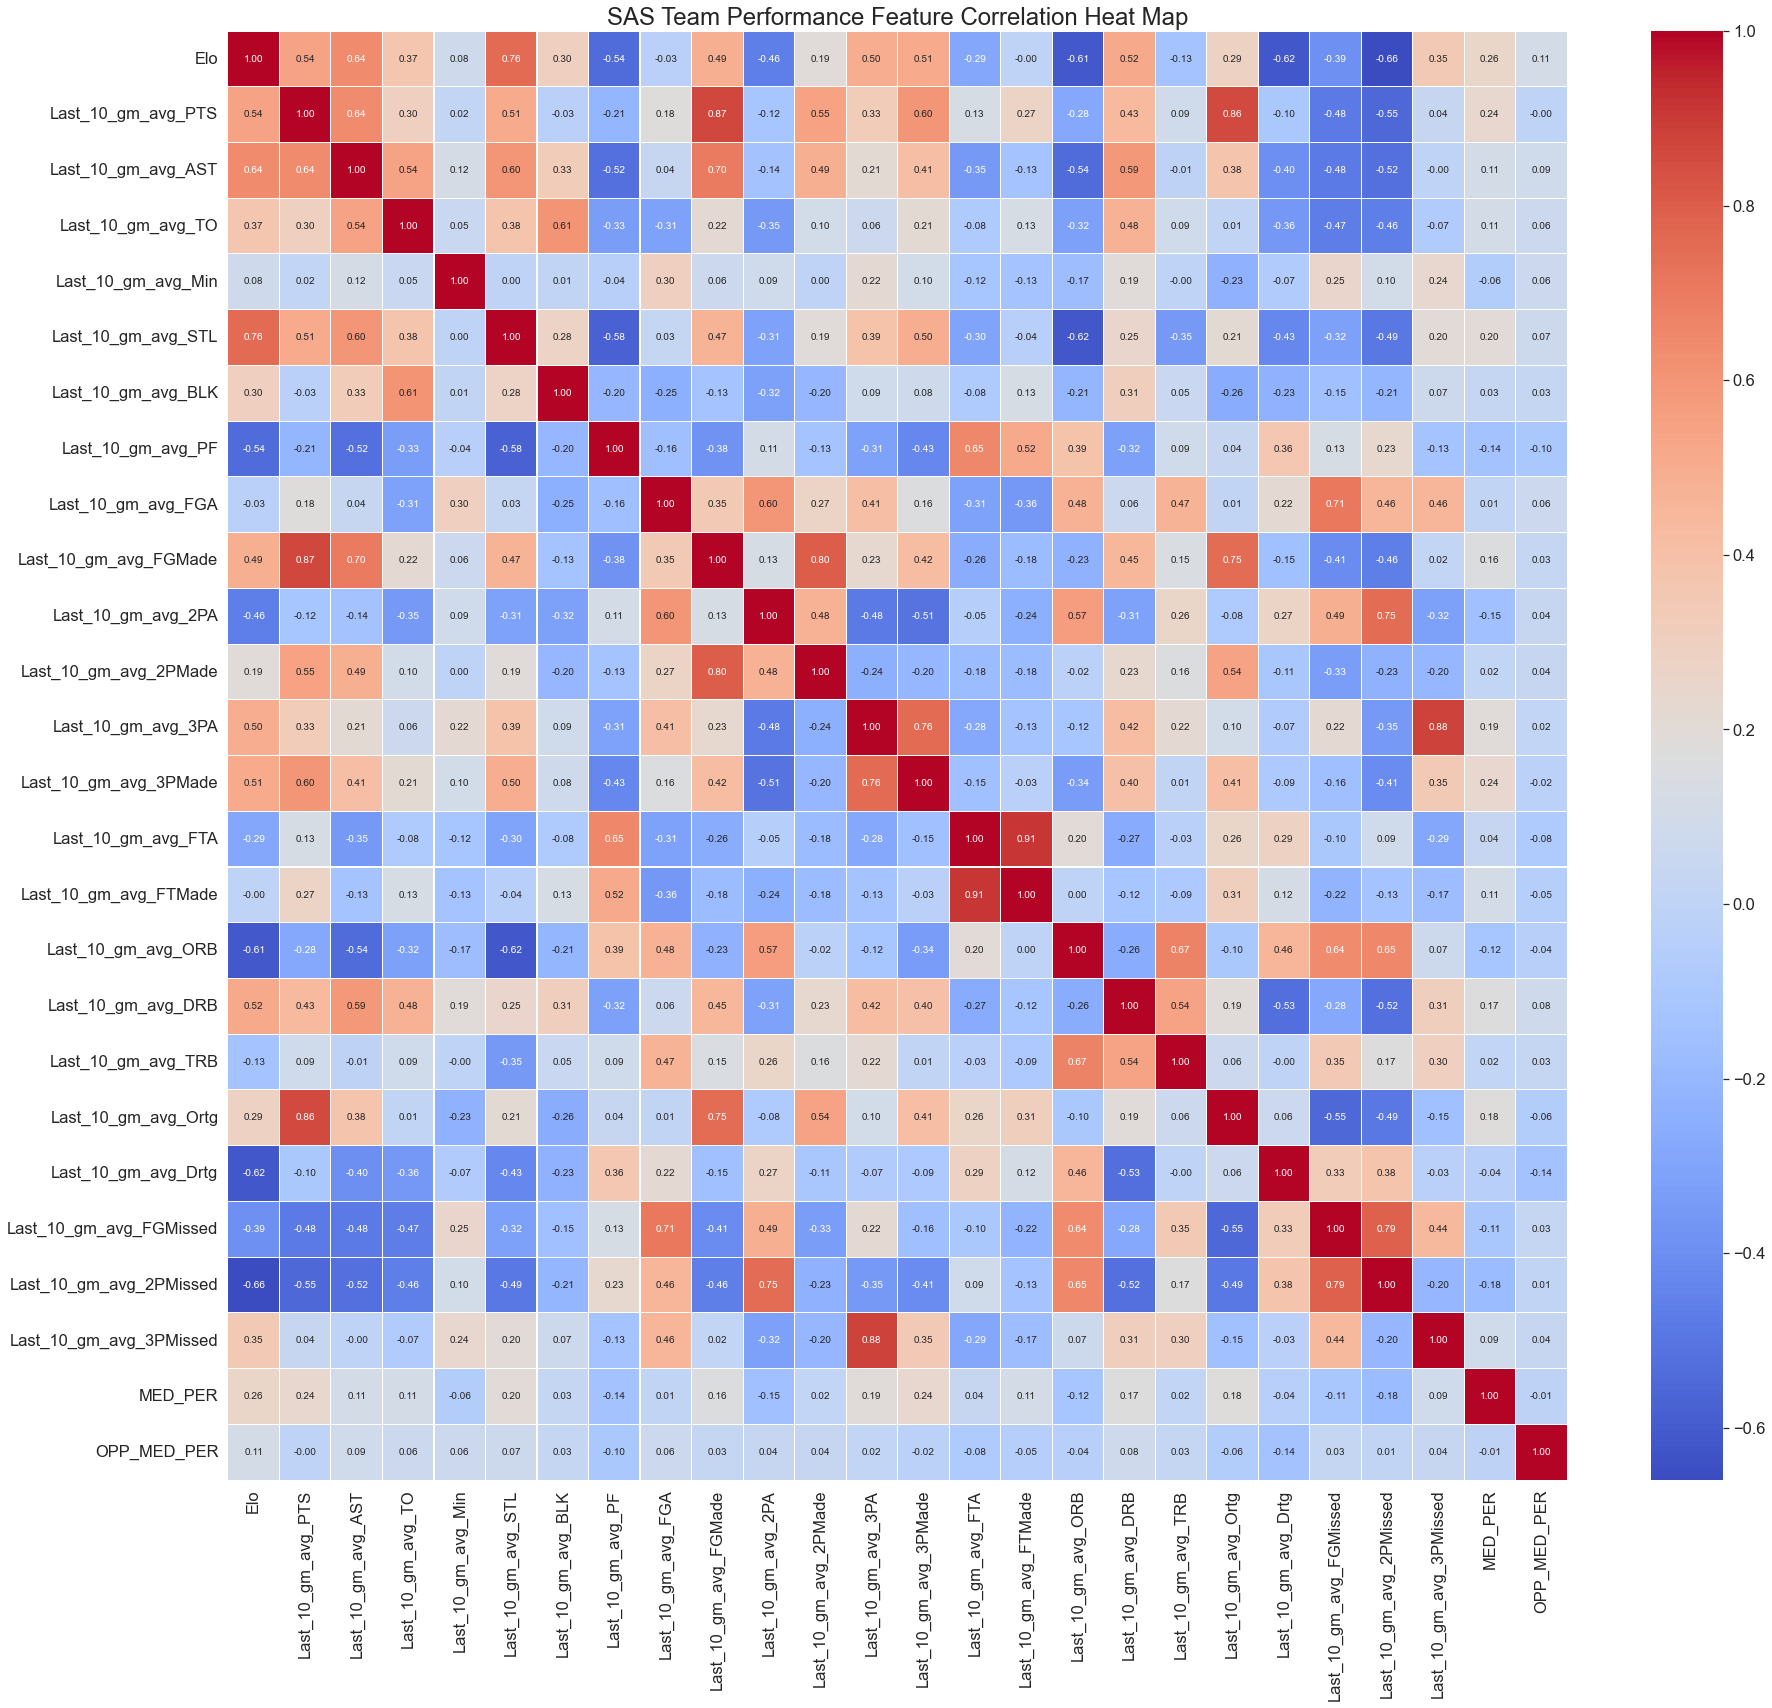

In [116]:
#For fun, lets review how our random team's seasons statistical correlations

cols = ['Elo','Last_10_gm_avg_PTS', 'Last_10_gm_avg_AST',
       'Last_10_gm_avg_TO', 'Last_10_gm_avg_Min', 'Last_10_gm_avg_STL',
       'Last_10_gm_avg_BLK', 'Last_10_gm_avg_PF', 'Last_10_gm_avg_FGA',
       'Last_10_gm_avg_FGMade', 'Last_10_gm_avg_2PA', 'Last_10_gm_avg_2PMade',
       'Last_10_gm_avg_3PA', 'Last_10_gm_avg_3PMade', 'Last_10_gm_avg_FTA',
       'Last_10_gm_avg_FTMade', 'Last_10_gm_avg_ORB', 'Last_10_gm_avg_DRB',
       'Last_10_gm_avg_TRB', 'Last_10_gm_avg_Ortg',
       'Last_10_gm_avg_Drtg', 'Last_10_gm_avg_FGMissed',
       'Last_10_gm_avg_2PMissed', 'Last_10_gm_avg_3PMissed', 'MED_PER',
       'OPP_MED_PER']

randomteamcorr = data[cols]

corrmat = randomteamcorr.corr()
f, ax = plt.subplots(figsize=(30, 25))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
plt.title("{} Team Performance Feature Correlation Heat Map".format(random_team), fontsize = 24)

### Reviewing Team Performance Statistics under correlated heat map

In [117]:
#Calculating Avg PER feature to add to Team Performance
data = final_team_performances_df

team_per = []
opp_per = []
for i, row in data.iterrows():
    game_id = row['GameID']
    stub_rows = player_stats[player_stats['gameID']== game_id]
    team_rows = stub_rows[stub_rows['Teamabbr'] == random_team]
    opp_rows = stub_rows[stub_rows['Teamabbr'] != random_team]
    
    team_per.append(np.median(team_rows['PER'].values))
    opp_per.append(np.median(opp_rows['PER'].values))

data['MED_PER'] = team_per
data['OPP_MED_PER'] = opp_per

/Users/Shawn/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/Shawn/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [118]:
data.columns

Index(['Date', 'GameID', 'season', 'Team_Elo_After', 'Team', 'Elo',
       'Where_Played', 'Last_10_gm_avg_PTS', 'Last_10_gm_avg_AST',
       'Last_10_gm_avg_TO', 'Last_10_gm_avg_Min', 'Last_10_gm_avg_STL',
       'Last_10_gm_avg_BLK', 'Last_10_gm_avg_PF', 'Last_10_gm_avg_FGA',
       'Last_10_gm_avg_FGMade', 'Last_10_gm_avg_2PA', 'Last_10_gm_avg_2PMade',
       'Last_10_gm_avg_3PA', 'Last_10_gm_avg_3PMade', 'Last_10_gm_avg_FTA',
       'Last_10_gm_avg_FTMade', 'Last_10_gm_avg_ORB', 'Last_10_gm_avg_DRB',
       'Last_10_gm_avg_TRB', 'Last_10_gm_avg_PTS10', 'Last_10_gm_avg_Ortg',
       'Last_10_gm_avg_Drtg', 'Last_10_gm_avg_FGMissed',
       'Last_10_gm_avg_2PMissed', 'Last_10_gm_avg_3PMissed', 'Win', 'MED_PER',
       'OPP_MED_PER'],
      dtype='object')

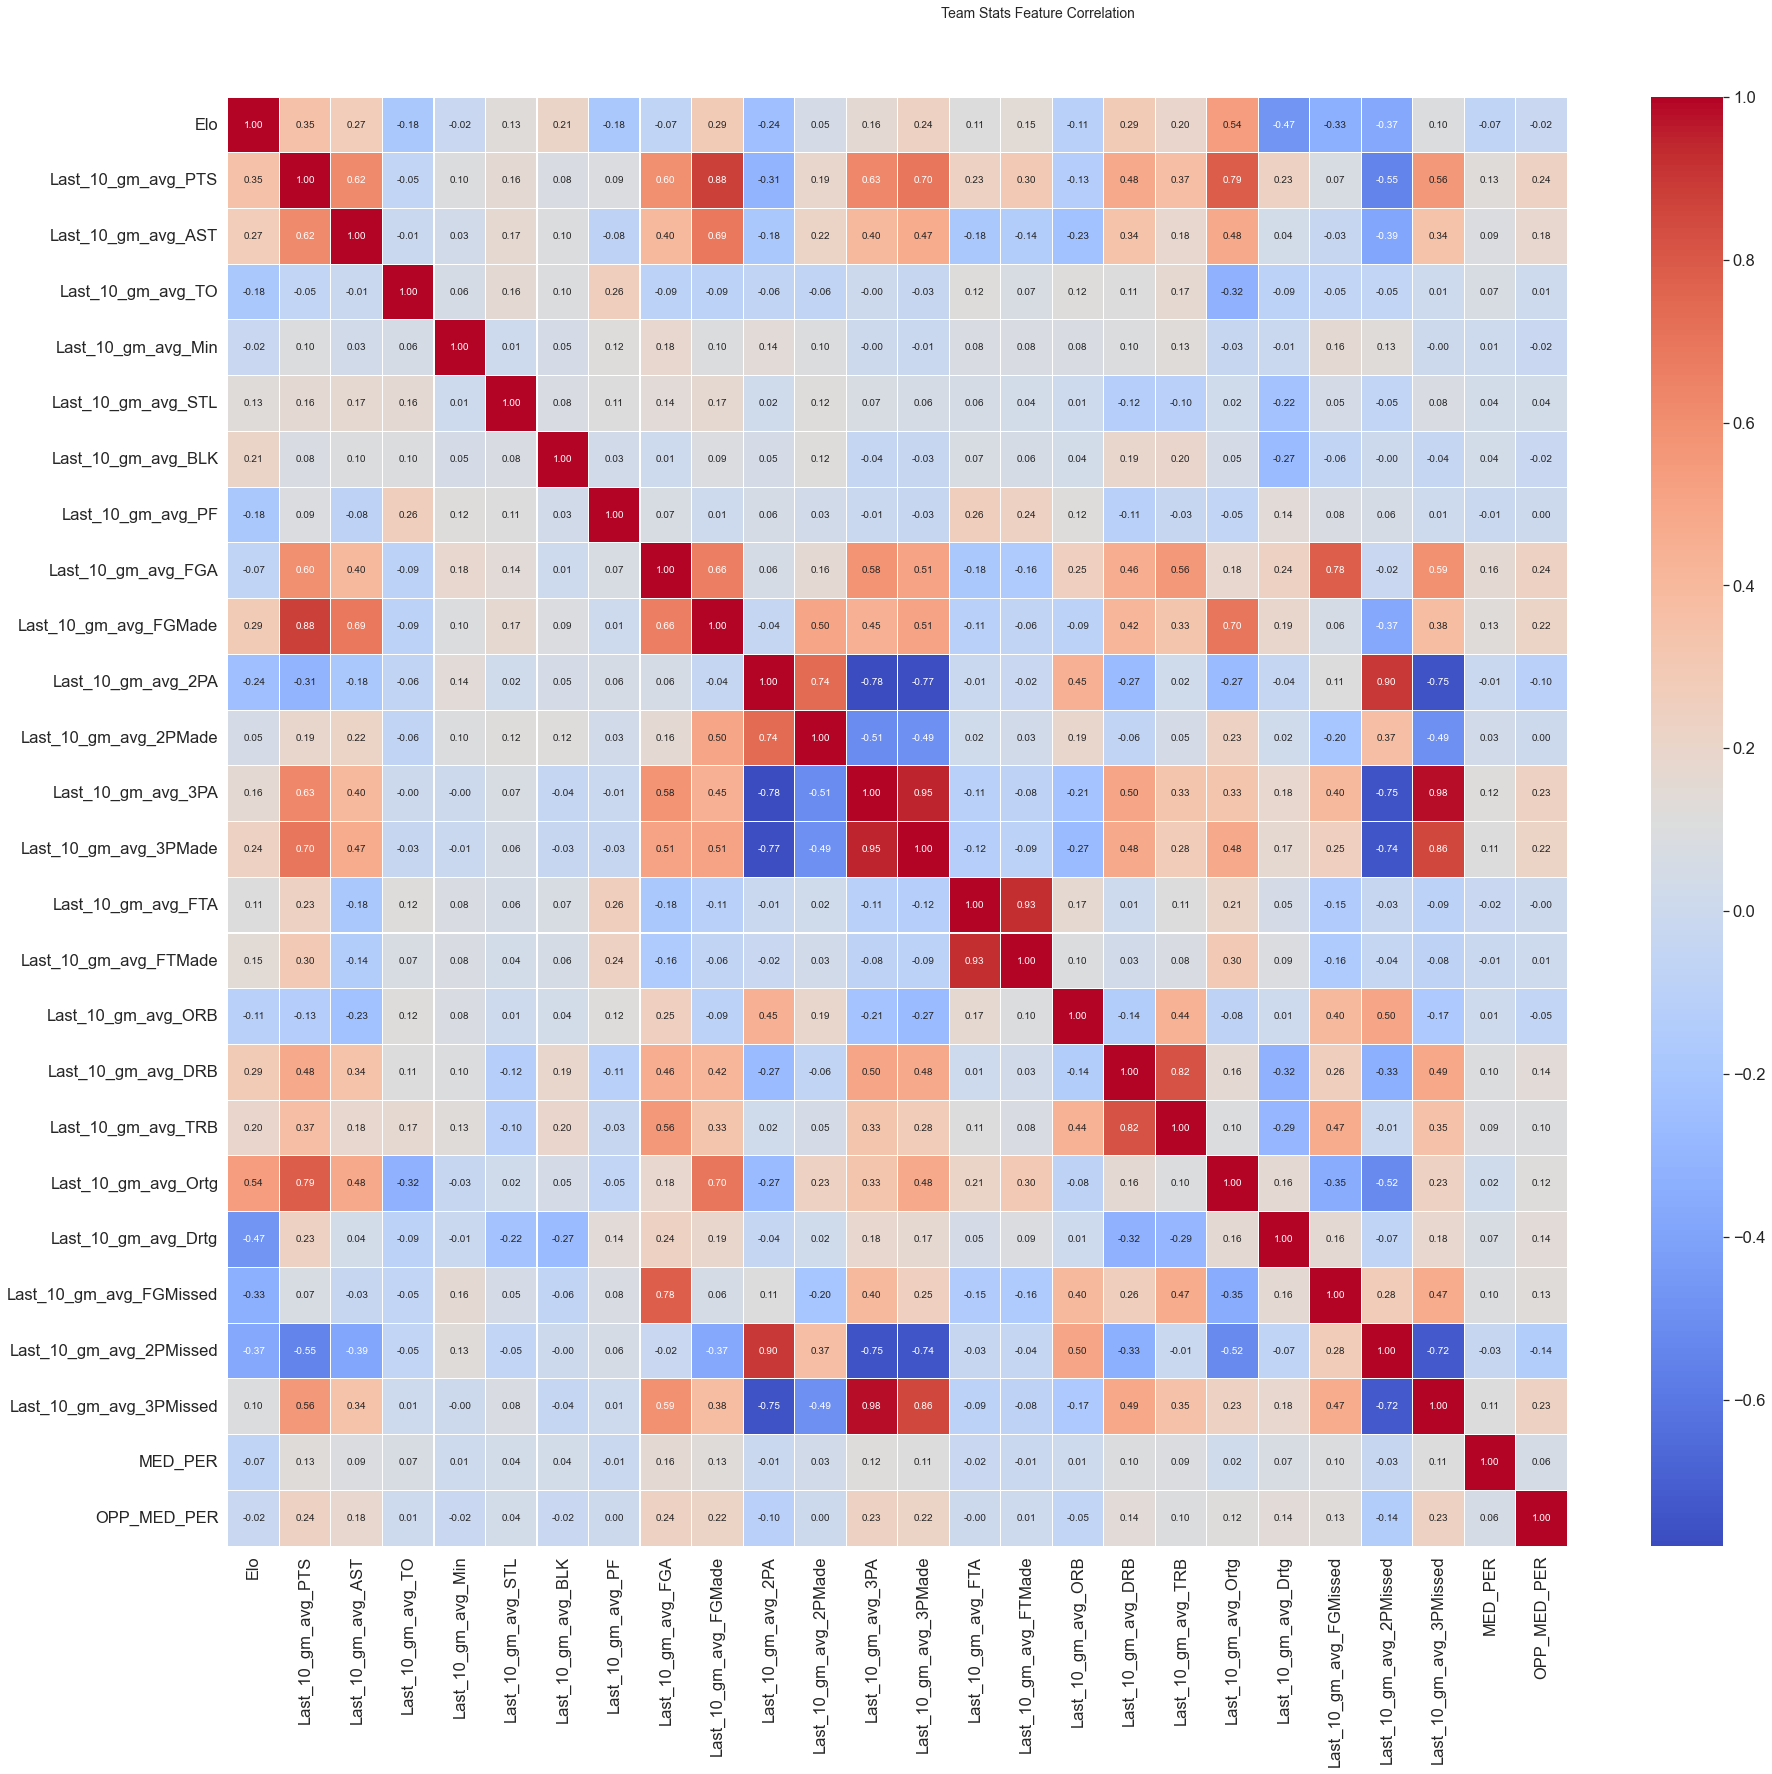

In [119]:
#Building Correlated Heat Map
cols = ['Elo',
       'Last_10_gm_avg_PTS', 'Last_10_gm_avg_AST',
       'Last_10_gm_avg_TO', 'Last_10_gm_avg_Min', 'Last_10_gm_avg_STL',
       'Last_10_gm_avg_BLK', 'Last_10_gm_avg_PF', 'Last_10_gm_avg_FGA',
       'Last_10_gm_avg_FGMade', 'Last_10_gm_avg_2PA', 'Last_10_gm_avg_2PMade',
       'Last_10_gm_avg_3PA', 'Last_10_gm_avg_3PMade', 'Last_10_gm_avg_FTA',
       'Last_10_gm_avg_FTMade', 'Last_10_gm_avg_ORB', 'Last_10_gm_avg_DRB',
       'Last_10_gm_avg_TRB', 'Last_10_gm_avg_Ortg',
       'Last_10_gm_avg_Drtg', 'Last_10_gm_avg_FGMissed',
       'Last_10_gm_avg_2PMissed', 'Last_10_gm_avg_3PMissed', 'MED_PER',
       'OPP_MED_PER']

finalcorr = data[cols]

corrmat = finalcorr.corr()
f, ax = plt.subplots(figsize=(30, 25))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Team Stats Feature Correlation', fontsize=14)

Positive Correlated Features
#FGMade (field goals made), Ortg (Offensive Rating = Score/Possession), TRB (Total Rebounds), AST (assists), PTS (points)

#The PER feature doesn't seem to have much correlation to any of the individual stats nor 

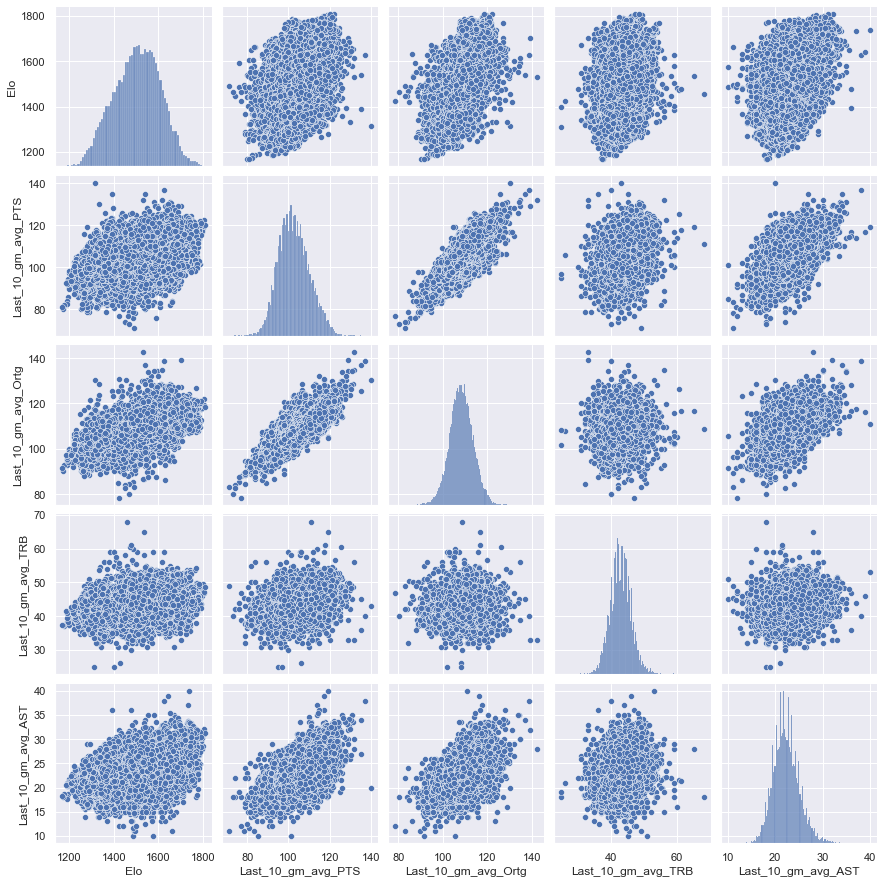

In [130]:
focus = ['Elo', 'Last_10_gm_avg_PTS', 'Last_10_gm_avg_Ortg', 
        'Last_10_gm_avg_TRB', 'Last_10_gm_avg_AST']

focusdata = data[focus]
sns.set(font_scale = 1)
g = sns.pairplot(focusdata)

# Section: 4 Modeling of the Final Team Stats

In this section, we will take our Final Team Stats DF that separates Home Teams and Away teams stats including their window performance stats and conduct our modeling. 

In [133]:
final_team_stats = pd.read_csv('final_team_stats.csv', index_col = 0)

Index(['Date', 'GameID', 'season', 'H_Team', 'A_Team', 'H_Team_Elo_Before',
       'A_Team_Elo_Before', 'H_Team_Elo_After', 'A_Team_Elo_After',
       'H_Last_10_gm_avg_PTS', 'H_Last_10_gm_avg_AST', 'H_Last_10_gm_avg_TO',
       'H_Last_10_gm_avg_Min', 'H_Last_10_gm_avg_STL', 'H_Last_10_gm_avg_BLK',
       'H_Last_10_gm_avg_PF', 'H_Last_10_gm_avg_FGA',
       'H_Last_10_gm_avg_FGMade', 'H_Last_10_gm_avg_2PA',
       'H_Last_10_gm_avg_2PMade', 'H_Last_10_gm_avg_3PA',
       'H_Last_10_gm_avg_3PMade', 'H_Last_10_gm_avg_FTA',
       'H_Last_10_gm_avg_FTMade', 'H_Last_10_gm_avg_ORB',
       'H_Last_10_gm_avg_DRB', 'H_Last_10_gm_avg_TRB',
       'H_Last_10_gm_avg_PTS10', 'H_Last_10_gm_avg_Ortg',
       'H_Last_10_gm_avg_Drtg', 'H_Last_10_gm_avg_FGMissed',
       'H_Last_10_gm_avg_2PMissed', 'H_Last_10_gm_avg_3PMissed',
       'A_Last_10_gm_avg_PTS', 'A_Last_10_gm_avg_AST', 'A_Last_10_gm_avg_TO',
       'A_Last_10_gm_avg_Min', 'A_Last_10_gm_avg_STL', 'A_Last_10_gm_avg_BLK',
       'A_Last_10

In [134]:
#remove non-numeric variables and separate into label and features

features = final_team_stats.drop(columns=['Date', 'GameID', 'season', 'H_Team', 'A_Team', 'H_Team_Elo_After', 'A_Team_Elo_After',
       'H_Last_10_gm_avg_PTS10', 
       'A_Last_10_gm_avg_PTS10', 'Label'])

label = final_team_stats['Label']

In [135]:
features

,H_Team_Elo_Before,A_Team_Elo_Before,H_Last_10_gm_avg_PTS,H_Last_10_gm_avg_AST,H_Last_10_gm_avg_TO,H_Last_10_gm_avg_Min,H_Last_10_gm_avg_STL,H_Last_10_gm_avg_BLK,H_Last_10_gm_avg_PF,H_Last_10_gm_avg_FGA,...,A_Last_10_gm_avg_FTA,A_Last_10_gm_avg_FTMade,A_Last_10_gm_avg_ORB,A_Last_10_gm_avg_DRB,A_Last_10_gm_avg_TRB,A_Last_10_gm_avg_Ortg,A_Last_10_gm_avg_Drtg,A_Last_10_gm_avg_FGMissed,A_Last_10_gm_avg_2PMissed,A_Last_10_gm_avg_3PMissed
0,1508.416895,1508.416895,103.0,24.0,10.0,240.0,5.0,5.0,20.0,79.0,...,27.0,19.0,8.0,34.0,42.0,112.60,107.40,41.0,31.0,10.0
1,1486.830104,1505.657856,84.0,15.0,17.0,240.0,3.0,8.0,16.0,84.0,...,37.0,27.0,14.0,32.0,46.0,116.20,111.40,45.0,29.0,16.0
2,1513.169896,1491.583105,95.0,24.0,9.0,240.0,8.0,5.0,23.0,81.0,...,32.0,22.0,11.0,28.0,39.0,107.40,112.60,46.0,32.0,14.0
3,1494.342144,1496.115314,115.0,22.0,14.0,240.0,8.0,2.0,26.0,92.0,...,25.0,19.0,9.0,36.0,45.0,101.40,103.50,44.0,32.0,12.0
4,1505.657856,1509.850900,90.0,16.0,16.0,240.0,10.0,0.0,28.0,74.0,...,44.0,33.0,14.0,26.0,40.0,120.30,105.80,34.0,27.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14134,1518.795548,1528.369430,117.9,27.1,13.2,240.0,5.8,3.6,22.9,88.9,...,24.1,19.5,10.2,33.4,43.6,121.65,120.32,47.3,25.9,21.4
14135,1683.137229,1548.559957,111.0,24.2,15.5,240.0,9.2,4.5,21.9,82.5,...,20.1,15.2,9.6,32.8,42.4,115.95,119.68,44.8,23.8,21.0
14136,1563.263075,1566.395438,110.4,24.0,13.6,240.0,8.1,6.1,20.3,88.0,...,24.5,19.9,7.8,34.5,42.3,111.90,110.31,44.2,19.4,24.8
14137,1642.593683,1586.866995,118.8,22.1,11.6,240.0,6.0,3.1,23.1,86.3,...,25.2,19.9,8.1,33.9,42.0,110.86,108.43,46.2,25.5,20.7


In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.25)

## 4.1 Logist Regression Model

We will utilize a first logistic regression model. 

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

LGmodel = LogisticRegression(random_state=42)
LGmodel.fit(X_train, y_train)

y_pred = LGmodel.predict(X_test)
metrics.accuracy_score(y_test, y_pred)


/Users/Shawn/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6676096181046676

# Previously version work to be sorted...

In [ ]:
#website - "https://www.kaggle.com/heeebsinc/nbaseasonstats201820"
#The above datasets are split into season from 2000 to 2020. We are only interested in 2008 - 2020.
cs_player= pd.read_csv('/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/DS_Guided_Capstone_2_Repo/virenv/player_stats/2008-2009.csv')

In [ ]:
cs_player.info()

In [ ]:
cs_player.head()

In [ ]:
print(cs_player['GameLink'])

In [ ]:
#Code for removing columns for future reference. 
#cs_player = cs_player.drop(['GameLink'], axis=1)

In [ ]:
#Question, when trying to add seasons to the dataset, it seems to immediately jump to 2019 instead of following
#the start year as noted below.
start_year = 2008
end_year = 2009

player_stats_combined_df = pd.DataFrame()

for i in range(12) :
  player_stats_file_path = '/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/DS_Guided_Capstone_2_Repo/virenv/player_stats/' + str(start_year) + "-" + str(end_year) + '.csv'

  player_stats_combined_df = player_stats_combined_df.append(pd.read_csv(player_stats_file_path))

  start_year = start_year + 1
  end_year = end_year + 1

In [ ]:
player_stats_combined_df.head()

In [ ]:
#set(player_stats_combined_df['Season'])

In [ ]:
player_stats_combined_df.info()

In [ ]:
player_stats_combined_df.describe()

In [ ]:
player_stats_combined_df.isnull().sum()

In [ ]:
player_stats_combined_df[player_stats_combined_df['3P%'].isnull()]

In [ ]:
threeptking = player_stats_combined_df[['Player','Team', 'Against', 'Date', '3PA', 'PTS']][player_stats_combined_df['3P%']==1]
threeptking[threeptking['3PA']>8]

In [ ]:
print(player_stats_combined_df[['Player','Date','3PA','Against','3P%']][player_stats_combined_df['3PA']>8])

In [ ]:
player_stats_combined_df['Ast/To'] = player_stats_combined_df['AST']/player_stats_combined_df['TOV']

In [ ]:
player_stats_combined_df = player_stats_combined_df.drop(['GameLink'], axis = 1)

In [ ]:
player_stats_combined_df['Date'] = pd.to_datetime(player_stats_combined_df['Date'])

In [ ]:
player_stats_combined_df['Date']

In [ ]:
#Dataset acquired from kaggle: 
#website - "https://www.kaggle.com/rafaelgreca/nba-games-box-score-since-1949"

cs_team = pd.read_csv('/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/DS_Guided_Capstone_2_Repo/virenv/team_stats/2019-2020.csv')

In [ ]:
cs_team.info()

In [ ]:
print(cs_team.columns.tolist())

In [ ]:
cs_team.head()

In [ ]:
start_year = 2008
end_year = 2009

team_stats_combined_df = pd.DataFrame()

for i in range(12) :
  team_stats_file_path = '/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/DS_Guided_Capstone_2_Repo/virenv/team_stats/' + str(start_year) + "-" + str(end_year) + '.csv'
  
  team_stats_combined_df = team_stats_combined_df.append(pd.read_csv(team_stats_file_path, index_col = 0))
  
  start_year = start_year + 1
  end_year = end_year + 1

In [ ]:
team_stats_combined_df.describe()

In [ ]:
team_stats_combined_df.isnull().sum()!=0

In [ ]:
team_stats_combined_df.columns[team_stats_combined_df.isnull().any()].tolist()

In [ ]:
#Dataset from prior investigation - NBA Combined Player Stats
#website - "https://towardsdatascience.com/predicting-the-outcome-of-nba-games-with-machine-learning-a810bb768f20"

ps_player = pd.read_csv('NBA_Combined_Player_Stats.csv', index_col= 0)

In [ ]:
ps_player.head()

In [ ]:
ps_player.info()

In [ ]:
## 2.2 REVIEWING PRIOR INVESTIGATION'S TEAM STATISTICS 

In [ ]:
#Dataset from prior investigation - NBA Combined Team Stats 
#website - "https://towardsdatascience.com/predicting-the-outcome-of-nba-games-with-machine-learning-a810bb768f20"

ps_team = pd.read_csv('/Users/Shawn/Documents/UNH_ML_SLF/MLassignments/UNH-Repo/DS_Guided_Capstone_2_Repo/virenv/NBA_Combined_Team_Stats.csv', index_col=0)

In [ ]:
ps_team.info()

In [ ]:
ps_team.head()

In [ ]:
ps_team.columns.to_list()

In [ ]:
range(3, 43, 2)